In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bs4
import requests
from io import StringIO

In [2]:
# In this case the table is commented out
# fetch the web page content
response = requests.get('https://fbref.com/en/comps/74/stats/Bolivian-Primera-Division-Stats')
soup = bs4.BeautifulSoup(response.content, 'html.parser')

# find all comments
comments = soup.find_all(string=lambda text:isinstance(text, bs4.Comment))
commented_out_tables = [bs4.BeautifulSoup(cmt, 'html.parser').find_all('table') for cmt in comments]

# filter to keep only single tables
commented_out_tables = [tab[0] for tab in commented_out_tables if len(tab) == 1]

# convert the table to a DF
df_liga_bol = pd.read_html(StringIO(str(commented_out_tables[0])))[0]

/tmp/ipykernel_3389/3226621458.py:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  commented_out_tables = [bs4.BeautifulSoup(cmt, 'html.parser').find_all('table') for cmt in comments]


In [14]:
df_liga_bol.head()

Unnamed: 0_level_0   Unnamed: 1_level_0 Unnamed: 2_level_0  \
                  Rk               Player             Nation   
0                  1  Carlos Enrique Áñez             bo BOL   
1                  2    Carlos Abastoflor             bo BOL   
2                  3    Carlos Abastoflor             bo BOL   
3                  4    Freddy Abastoflor             bo BOL   
4                  5        Victor Abrego             bo BOL   

  Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0  \
                 Pos              Squad                Age               Born   
0                 DF  Oriente Petrolero                 28               1995   
1                 MF       Always Ready                 21               2002   
2                 MF    Real Santa Cruz                 21               2002   
3                 FW    Real Santa Cruz                 31               1993   
4                 FW    Nacional Potosí                 26               1997   

  Playing Time               ... Performance                 Per 90 Minutes  \
            MP Starts   Min  ...          PK PKatt CrdY CrdR            Gls   
0           25     21  1771  ...           0     0    9    1           0.15   
1            4      2   140  ...           0     0    0    0           0.00   
2           20     19  1525  ...           0     0    5    0           0.12   
3            4      2   232  ...           0     0    0    0           0.00   
4           21      8   886  ...           2     2    2    0           1.02   

                           Unnamed: 24_level_0  
    Ast   G+A  G-PK G+A-PK             Matches  
0  0.00  0.15  0.15   0.15             Matches  
1  0.00  0.00  0.00   0.00             Matches  
2  0.18  0.30  0.12   0.30             Matches  
3  0.00  0.00  0.00   0.00             Matches  
4  0.30  1.32  0.81   1.12             Matches  

[5 rows x 25 columns]

In [15]:
# check number of rows
df_liga_bol.shape

(637, 25)

In [18]:
# get full columns
df_liga_bol.columns.values

array(['Unnamed: 0_level_0_Rk', 'Unnamed: 1_level_0_Player',
       'Unnamed: 2_level_0_Nation', 'Unnamed: 3_level_0_Pos',
       'Unnamed: 4_level_0_Squad', 'Unnamed: 5_level_0_Age',
       'Unnamed: 6_level_0_Born', 'Playing Time_MP',
       'Playing Time_Starts', 'Playing Time_Min', 'Playing Time_90s',
       'Performance_Gls', 'Performance_Ast', 'Performance_G+A',
       'Performance_G-PK', 'Performance_PK', 'Performance_PKatt',
       'Performance_CrdY', 'Performance_CrdR', 'Per 90 Minutes_Gls',
       'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A', 'Per 90 Minutes_G-PK',
       'Per 90 Minutes_G+A-PK', 'Unnamed: 24_level_0_Matches'],
      dtype=object)

In [17]:
# join columns
df_liga_bol.columns = ['_'.join(col).strip() for col in df_liga_bol.columns.values]
df_liga_bol.head()

,Unnamed: 0_level_0_Rk,Unnamed: 1_level_0_Player,Unnamed: 2_level_0_Nation,Unnamed: 3_level_0_Pos,Unnamed: 4_level_0_Squad,Unnamed: 5_level_0_Age,Unnamed: 6_level_0_Born,Playing Time_MP,Playing Time_Starts,Playing Time_Min,...,Performance_PK,Performance_PKatt,Performance_CrdY,Performance_CrdR,Per 90 Minutes_Gls,Per 90 Minutes_Ast,Per 90 Minutes_G+A,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK,Unnamed: 24_level_0_Matches
0,1,Carlos Enrique Áñez,bo BOL,DF,Oriente Petrolero,28,1995,25,21,1771,...,0,0,9,1,0.15,0.00,0.15,0.15,0.15,Matches
1,2,Carlos Abastoflor,bo BOL,MF,Always Ready,21,2002,4,2,140,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,Matches
2,3,Carlos Abastoflor,bo BOL,MF,Real Santa Cruz,21,2002,20,19,1525,...,0,0,5,0,0.12,0.18,0.30,0.12,0.30,Matches
3,4,Freddy Abastoflor,bo BOL,FW,Real Santa Cruz,31,1993,4,2,232,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,Matches
4,5,Victor Abrego,bo BOL,FW,Nacional Potosí,26,1997,21,8,886,...,2,2,2,0,1.02,0.30,1.32,0.81,1.12,Matches


In [19]:
# delete columns reassigning to the DF
df_liga_bol = df_liga_bol.drop(['Unnamed: 0_level_0_Rk', 'Unnamed: 24_level_0_Matches'], axis=1)

In [20]:
df_liga_bol.columns.values

array(['Unnamed: 1_level_0_Player', 'Unnamed: 2_level_0_Nation',
       'Unnamed: 3_level_0_Pos', 'Unnamed: 4_level_0_Squad',
       'Unnamed: 5_level_0_Age', 'Unnamed: 6_level_0_Born',
       'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK'], dtype=object)

In [21]:
# rename columns labels
df_liga_bol.columns = ['player', 'nation', 'pos', 'squad', 'age', 'born', 'mp', 'starts', 'min', '90s', 'goals', 'ast', 'g+a', 'g-pk', 'pk', 'pkatt', 'crdy', 'crdr', 'per_gls', 'per_ast', 'per_g+a', 'per_g-pk', 'per_g+a-pk']

In [24]:
df_liga_bol.head()

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
0,Carlos Enrique Áñez,bo BOL,DF,Oriente Petrolero,28,1995,25,21,1771,19.7,...,3,0,0,9,1,0.15,0.00,0.15,0.15,0.15
1,Carlos Abastoflor,bo BOL,MF,Always Ready,21,2002,4,2,140,1.6,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
2,Carlos Abastoflor,bo BOL,MF,Real Santa Cruz,21,2002,20,19,1525,16.9,...,2,0,0,5,0,0.12,0.18,0.30,0.12,0.30
3,Freddy Abastoflor,bo BOL,FW,Real Santa Cruz,31,1993,4,2,232,2.6,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
4,Victor Abrego,bo BOL,FW,Nacional Potosí,26,1997,21,8,886,9.8,...,8,2,2,2,0,1.02,0.30,1.32,0.81,1.12


Delete inconsistent rows

In [27]:
df_liga_bol = df_liga_bol[df_liga_bol['player'] != 'Player']

In [29]:
# save CSV

df_liga_bol.to_csv('/home/axel/Code/Python/axel/football_analysis/csv/liga_bol.csv', index=False)

Read CSV

In [2]:
df_liga_bol = pd.read_csv('/home/axel/Code/Python/axel/football_analysis/csv/liga_bol.csv')
df_liga_bol.head()

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
0,Carlos Enrique Áñez,bo BOL,DF,Oriente Petrolero,28.0,1995.0,25,21,1771,19.7,...,3,0,0,9,1,0.15,0.00,0.15,0.15,0.15
1,Carlos Abastoflor,bo BOL,MF,Always Ready,21.0,2002.0,4,2,140,1.6,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
2,Carlos Abastoflor,bo BOL,MF,Real Santa Cruz,21.0,2002.0,20,19,1525,16.9,...,2,0,0,5,0,0.12,0.18,0.30,0.12,0.30
3,Freddy Abastoflor,bo BOL,FW,Real Santa Cruz,31.0,1993.0,4,2,232,2.6,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
4,Victor Abrego,bo BOL,FW,Nacional Potosí,26.0,1997.0,21,8,886,9.8,...,8,2,2,2,0,1.02,0.30,1.32,0.81,1.12


In [3]:
df_copy_bol = df_liga_bol.copy()
df_copy_bol.head()

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
0,Carlos Enrique Áñez,bo BOL,DF,Oriente Petrolero,28.0,1995.0,25,21,1771,19.7,...,3,0,0,9,1,0.15,0.00,0.15,0.15,0.15
1,Carlos Abastoflor,bo BOL,MF,Always Ready,21.0,2002.0,4,2,140,1.6,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
2,Carlos Abastoflor,bo BOL,MF,Real Santa Cruz,21.0,2002.0,20,19,1525,16.9,...,2,0,0,5,0,0.12,0.18,0.30,0.12,0.30
3,Freddy Abastoflor,bo BOL,FW,Real Santa Cruz,31.0,1993.0,4,2,232,2.6,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
4,Victor Abrego,bo BOL,FW,Nacional Potosí,26.0,1997.0,21,8,886,9.8,...,8,2,2,2,0,1.02,0.30,1.32,0.81,1.12


In [5]:
df_copy_bol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   player      613 non-null    object 
 1   nation      570 non-null    object 
 2   pos         588 non-null    object 
 3   squad       613 non-null    object 
 4   age         570 non-null    float64
 5   born        570 non-null    float64
 6   mp          613 non-null    int64  
 7   starts      613 non-null    int64  
 8   min         613 non-null    int64  
 9   90s         613 non-null    float64
 10  goals       613 non-null    int64  
 11  ast         613 non-null    int64  
 12  g+a         613 non-null    int64  
 13  g-pk        613 non-null    int64  
 14  pk          613 non-null    int64  
 15  pkatt       613 non-null    int64  
 16  crdy        613 non-null    int64  
 17  crdr        613 non-null    int64  
 18  per_gls     613 non-null    float64
 19  per_ast     613 non-null    f

Null values

In [6]:
# NULL values

df_copy_bol.isnull().sum()

player         0
nation        43
pos           25
squad          0
age           43
born          43
mp             0
starts         0
min            0
90s            0
goals          0
ast            0
g+a            0
g-pk           0
pk             0
pkatt          0
crdy           0
crdr           0
per_gls        0
per_ast        0
per_g+a        0
per_g-pk       0
per_g+a-pk     0
dtype: int64

In [7]:
# check NULL values for all columns

# Count null values in each column
null_counts = df_copy_bol.isnull().sum()

# Print the result column by column
for column, count in null_counts.items():
    print(f"Column '{column}' has {count} null values.")

Column 'player' has 0 null values.
Column 'nation' has 43 null values.
Column 'pos' has 25 null values.
Column 'squad' has 0 null values.
Column 'age' has 43 null values.
Column 'born' has 43 null values.
Column 'mp' has 0 null values.
Column 'starts' has 0 null values.
Column 'min' has 0 null values.
Column '90s' has 0 null values.
Column 'goals' has 0 null values.
Column 'ast' has 0 null values.
Column 'g+a' has 0 null values.
Column 'g-pk' has 0 null values.
Column 'pk' has 0 null values.
Column 'pkatt' has 0 null values.
Column 'crdy' has 0 null values.
Column 'crdr' has 0 null values.
Column 'per_gls' has 0 null values.
Column 'per_ast' has 0 null values.
Column 'per_g+a' has 0 null values.
Column 'per_g-pk' has 0 null values.
Column 'per_g+a-pk' has 0 null values.


In [8]:
# check by specific columns NULL values

column_name = 'goals'

null_count = df_copy_bol[column_name].isnull().sum()

print(f"Column '{column_name}' has {null_count} null values.")

Column 'goals' has 0 null values.


In [17]:
# display only rows where age is null

df_copy_bol[df_copy_bol['age'].isnull()]

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
27,Angelo Alvarado,NaN,MF,Real Santa Cruz,NaN,NaN,1,0,1,0.0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
37,Rubem Anagua,NaN,NaN,Oriente Petrolero,NaN,NaN,1,1,67,0.7,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
50,Daniel Aponte,NaN,MF,Blooming,NaN,NaN,21,18,1454,16.2,...,1,0,0,3,0,0.06,0.12,0.19,0.06,0.19
78,Miguel Barns,NaN,NaN,Real Tomayapo,NaN,NaN,1,1,90,1.0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
93,José Berrios,NaN,DF,Aurora,NaN,NaN,1,0,12,0.1,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
99,Gerel Buezo,NaN,MF,The Strongest,NaN,NaN,3,0,78,0.9,...,1,0,0,0,0,1.15,0.00,1.15,1.15,1.15
117,C. Campos,NaN,FW,FC Universitario,NaN,NaN,1,0,2,0.0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
123,Juvenal Caraballo,NaN,NaN,Oriente Petrolero,NaN,NaN,5,1,182,2.0,...,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00
124,Massiel Cardan,NaN,MF,Real Tomayapo,NaN,NaN,11,4,291,3.2,...,1,0,0,0,0,0.31,0.31,0.62,0.31,0.62
133,Santiago Castedo,NaN,FW,Blooming,NaN,NaN,4,3,223,2.5,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00


Group by

In [6]:
# mean age by teams
df_copy_bol.groupby('squad')['age'].agg(['mean']).sort_values(by=['mean'], ascending=True)

,mean
squad,
Always Ready,22.100000
Royal Parí,24.228571
GV San José,25.076923
San Antonio Bulo Bulo,25.210526
Bolívar,25.250000
Real Santa Cruz,25.477273
Oriente Petrolero,25.571429
FC Universitario,25.864865
Wilstermann,26.028571


In [7]:
# Mean age by teams and nations
df_copy_bol.groupby(['squad', 'nation'])['age'].mean()

squad         nation
Always Ready  ar ARG    37.000000
              bo BOL    19.933333
              br BRA    27.000000
              co COL    27.500000
              ec ECU    26.000000
                          ...    
Wilstermann   bo BOL    23.095238
              br BRA    29.666667
              mx MEX    29.000000
              py PAR    28.333333
              uy URU    29.500000
Name: age, Length: 95, dtype: float64

Sort players by age | Sub 20

In [8]:
df_sub20 = df_copy_bol[(df_copy_bol['born'] >= 2004)].reset_index(drop=True)
df_sub20.shape

(95, 23)

In [24]:
# df_sub20['nation'].value_counts()
# df_sub20['pos'].value_counts()
# df_sub20['squad'].value_counts()
# df_sub20['age'].value_counts()
df_sub20['goals'].value_counts()

goals
0    73
1    12
2     5
3     4
4     1
Name: count, dtype: int64

Sub 20 | Squads with most goals

In [9]:
df_sub20.groupby(['squad'])['goals'].sum().sort_values(ascending=False)

squad
FC Universitario         6
San Antonio Bulo Bulo    6
Aurora                   5
Always Ready             5
Wilstermann              5
Royal Parí               3
GV San José              3
Bolívar                  2
Real Santa Cruz          1
The Strongest            1
Nacional Potosí          1
Blooming                 0
Indep Petrolero          0
Guabirá                  0
Real Tomayapo            0
Oriente Petrolero        0
Name: goals, dtype: int64

Get those 6 goals of FC UNIVERSITARIO

In [17]:
# Filter the DataFrame
team_df = df_sub20[df_sub20['squad'] == 'FC Universitario']
team_df

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
8,Leonardo Arana,bo BOL,MF,FC Universitario,19.0,2004.0,11,2,344,3.8,...,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00
22,Juan Cuellar,bo BOL,MF,FC Universitario,17.0,2006.0,23,10,1003,11.1,...,3,0,0,1,1,0.27,0.09,0.36,0.27,0.36
45,Julio Lazarte,bo BOL,MF,FC Universitario,15.0,2008.0,1,1,90,1.0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
67,Raúl Rocabado,bo BOL,MF,FC Universitario,19.0,2004.0,26,24,1818,20.2,...,3,0,0,2,0,0.15,0.05,0.20,0.15,0.20
87,V. Vargas,bo BOL,FW,FC Universitario,19.0,2004.0,1,0,1,0.0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00


In [18]:
# Sort by the 'goals' column in descending order
team_sorted = team_df.sort_values(by='goals', ascending=False)
team_sorted

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
22,Juan Cuellar,bo BOL,MF,FC Universitario,17.0,2006.0,23,10,1003,11.1,...,3,0,0,1,1,0.27,0.09,0.36,0.27,0.36
67,Raúl Rocabado,bo BOL,MF,FC Universitario,19.0,2004.0,26,24,1818,20.2,...,3,0,0,2,0,0.15,0.05,0.20,0.15,0.20
8,Leonardo Arana,bo BOL,MF,FC Universitario,19.0,2004.0,11,2,344,3.8,...,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00
45,Julio Lazarte,bo BOL,MF,FC Universitario,15.0,2008.0,1,1,90,1.0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
87,V. Vargas,bo BOL,FW,FC Universitario,19.0,2004.0,1,0,1,0.0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00


In [19]:
# Select the top 3 players
team_sorted[['player', 'goals']]

,player,goals
22,Juan Cuellar,3
67,Raúl Rocabado,3
8,Leonardo Arana,0
45,Julio Lazarte,0
87,V. Vargas,0


Sub 20 | Squads with most assists

In [20]:
df_sub20.groupby(['squad'])['ast'].sum().sort_values(ascending=False)

squad
San Antonio Bulo Bulo    8
GV San José              7
Royal Parí               6
Always Ready             5
Bolívar                  5
Aurora                   4
Indep Petrolero          4
Nacional Potosí          3
FC Universitario         2
The Strongest            2
Guabirá                  1
Blooming                 1
Wilstermann              1
Real Tomayapo            0
Oriente Petrolero        0
Real Santa Cruz          0
Name: ast, dtype: int64

Get players of San Antonio who made the assists

In [21]:
team_df = df_sub20[df_sub20['squad'] == 'San Antonio Bulo Bulo']
team_df

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
0,Wilber Aguilar Diaz,bo BOL,NaN,San Antonio Bulo Bulo,17.0,2007.0,1,0,7,0.1,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
23,Marcelo De Lima Castro,bo BOL,DF,San Antonio Bulo Bulo,18.0,2005.0,21,11,1205,13.4,...,2,0,0,1,0,0.15,0.07,0.22,0.15,0.22
37,Kevin Gutiérrez,bo BOL,FW,San Antonio Bulo Bulo,16.0,2007.0,8,3,283,3.1,...,0,0,0,0,0,0.00,0.32,0.32,0.00,0.32
52,Gustavo Mendoza,bo BOL,FW,San Antonio Bulo Bulo,19.0,2004.0,30,29,2458,27.3,...,3,0,0,3,0,0.11,0.22,0.33,0.11,0.33
53,Leonardo Montenegro,bo BOL,DF,San Antonio Bulo Bulo,18.0,2005.0,10,3,362,4.0,...,1,0,0,5,0,0.25,0.00,0.25,0.25,0.25
91,Sebastian Villarroel,bo BOL,NaN,San Antonio Bulo Bulo,16.0,2007.0,2,2,180,2.0,...,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00


In [22]:
team_sorted = team_df.sort_values(by='ast', ascending=False)
team_sorted

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
52,Gustavo Mendoza,bo BOL,FW,San Antonio Bulo Bulo,19.0,2004.0,30,29,2458,27.3,...,3,0,0,3,0,0.11,0.22,0.33,0.11,0.33
23,Marcelo De Lima Castro,bo BOL,DF,San Antonio Bulo Bulo,18.0,2005.0,21,11,1205,13.4,...,2,0,0,1,0,0.15,0.07,0.22,0.15,0.22
37,Kevin Gutiérrez,bo BOL,FW,San Antonio Bulo Bulo,16.0,2007.0,8,3,283,3.1,...,0,0,0,0,0,0.00,0.32,0.32,0.00,0.32
0,Wilber Aguilar Diaz,bo BOL,NaN,San Antonio Bulo Bulo,17.0,2007.0,1,0,7,0.1,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
53,Leonardo Montenegro,bo BOL,DF,San Antonio Bulo Bulo,18.0,2005.0,10,3,362,4.0,...,1,0,0,5,0,0.25,0.00,0.25,0.25,0.25
91,Sebastian Villarroel,bo BOL,NaN,San Antonio Bulo Bulo,16.0,2007.0,2,2,180,2.0,...,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00


In [25]:
team_sorted[['player', 'ast']]

,player,ast
52,Gustavo Mendoza,6
23,Marcelo De Lima Castro,1
37,Kevin Gutiérrez,1
0,Wilber Aguilar Diaz,0
53,Leonardo Montenegro,0
91,Sebastian Villarroel,0


Squad sub 20 with most minutes

In [26]:
df_sub20.groupby('squad')['min'].sum().sort_values(ascending=False)

squad
GV San José              9121
Always Ready             4854
Royal Parí               4506
San Antonio Bulo Bulo    4495
Bolívar                  4394
Nacional Potosí          4310
Aurora                   4240
The Strongest            3893
Wilstermann              3571
FC Universitario         3256
Guabirá                  2700
Indep Petrolero          2604
Blooming                 1932
Oriente Petrolero        1482
Real Tomayapo            1340
Real Santa Cruz           452
Name: min, dtype: int64

Heatmap players sub20 minutes played

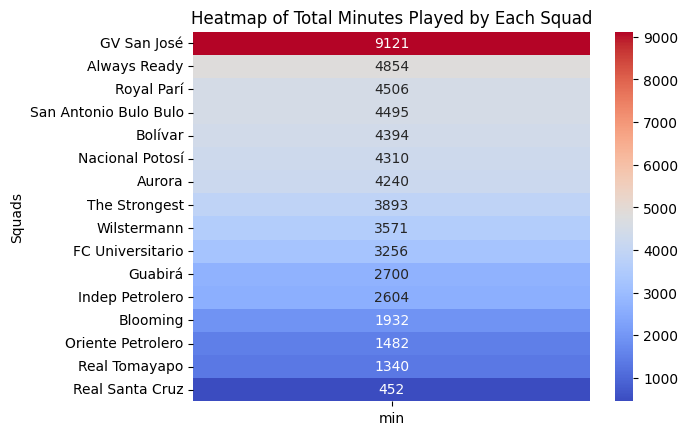

In [27]:
import seaborn as sns

sorted_squads = df_sub20.groupby('squad')['min'].sum().sort_values(ascending=False)
sns.heatmap(sorted_squads.to_frame(), annot=True, cmap='coolwarm', fmt='g')

plt.title('Heatmap of Total Minutes Played by Each Squad')
plt.ylabel('Squads')
plt.show()

Heatmap player sub 20 | Formal version

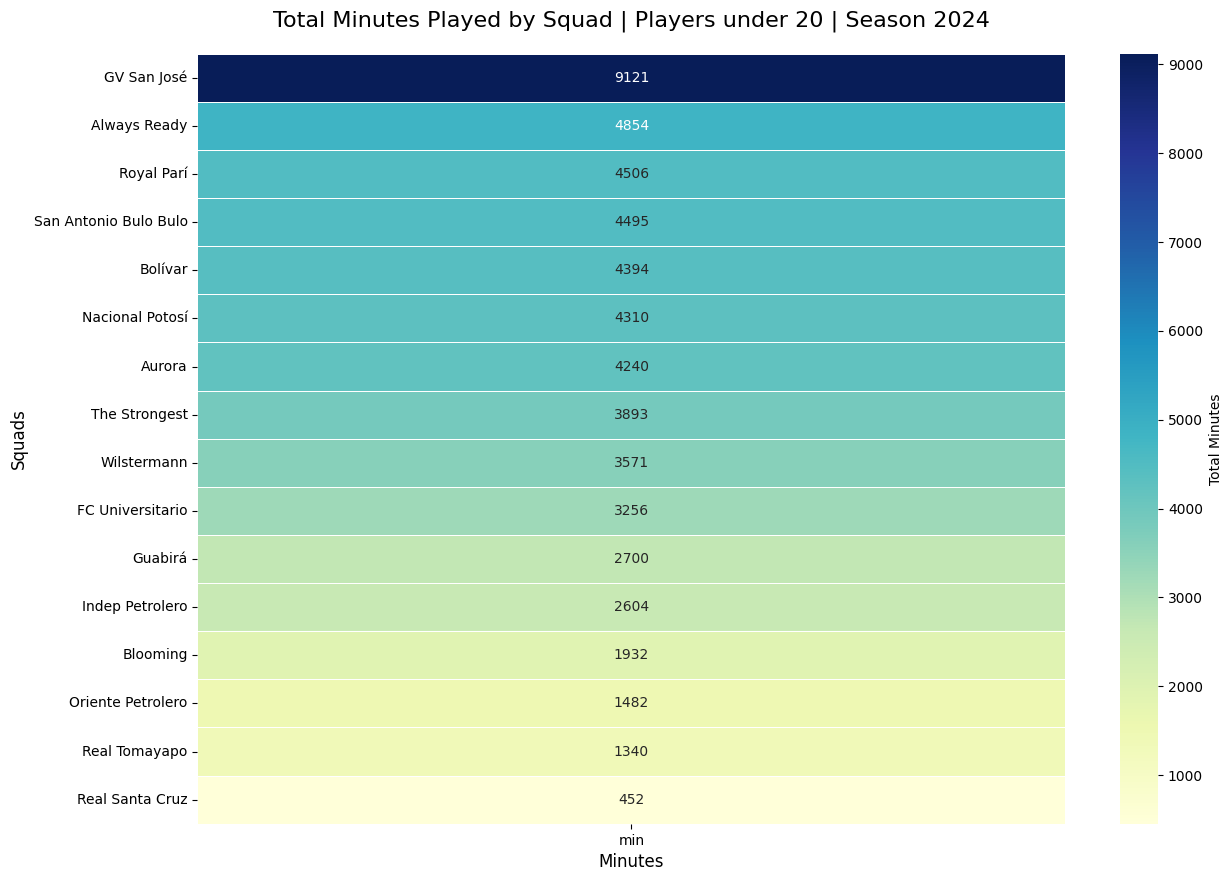

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation
sorted_squads = df_sub20.groupby('squad')['min'].sum().sort_values(ascending=False)

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    sorted_squads.to_frame(),
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={'label': 'Total Minutes'}
)

# Add labels and title
plt.title('Total Minutes Played by Squad | Players under 20 | Season 2024', fontsize=16, pad=20)
plt.xlabel('Minutes', fontsize=12)
plt.ylabel('Squads', fontsize=12)

# Adjust font and display
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
# CHANGE THIS TO YOUR PATH
# plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)
plt.show()

Sort by MINUTES | Sub 20 | By player

In [29]:
df_sub20.sort_values(by=['min'], ascending=False).head(10)

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
84,Andrés Torrico,bo BOL,MF,Nacional Potosí,19.0,2004.0,40,38,3510,39.0,...,1,0,0,3,0,0.03,0.05,0.08,0.03,0.08
19,Carlos Cejas,bo BOL,DF,Aurora,20.0,2004.0,36,30,2894,32.2,...,4,0,0,8,1,0.12,0.12,0.25,0.12,0.25
42,Jhon Jairo Velasco,bo BOL,DF,Guabirá,19.0,2004.0,33,31,2674,29.7,...,0,0,0,7,0,0.00,0.03,0.03,0.00,0.03
14,Ronald Bustos,bo BOL,FW,The Strongest,19.0,2004.0,31,31,2567,28.5,...,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00
52,Gustavo Mendoza,bo BOL,FW,San Antonio Bulo Bulo,19.0,2004.0,30,29,2458,27.3,...,3,0,0,3,0,0.11,0.22,0.33,0.11,0.33
56,Celin Padilla,bo BOL,DF,Royal Parí,19.0,2004.0,32,28,2322,25.8,...,2,0,0,6,0,0.08,0.12,0.19,0.08,0.19
62,Luiz Paz,bo BOL,DF,Bolívar,19.0,2004.0,36,22,2277,25.3,...,0,0,0,2,0,0.00,0.08,0.08,0.00,0.08
92,Lider Yanarico,bo BOL,DF,GV San José,17.0,2006.0,27,23,2083,23.1,...,0,0,0,4,0,0.00,0.04,0.04,0.00,0.04
85,Ervin Vaca,bo BOL,MF,Bolívar,19.0,2004.0,29,23,1836,20.4,...,2,0,0,8,0,0.10,0.10,0.20,0.10,0.20
67,Raúl Rocabado,bo BOL,MF,FC Universitario,19.0,2004.0,26,24,1818,20.2,...,3,0,0,2,0,0.15,0.05,0.20,0.15,0.20


Sort by MATCHES PLAYED | Sub 20

In [30]:
df_sub20_mp = df_sub20.sort_values(by=['mp'], ascending=False).head(10)

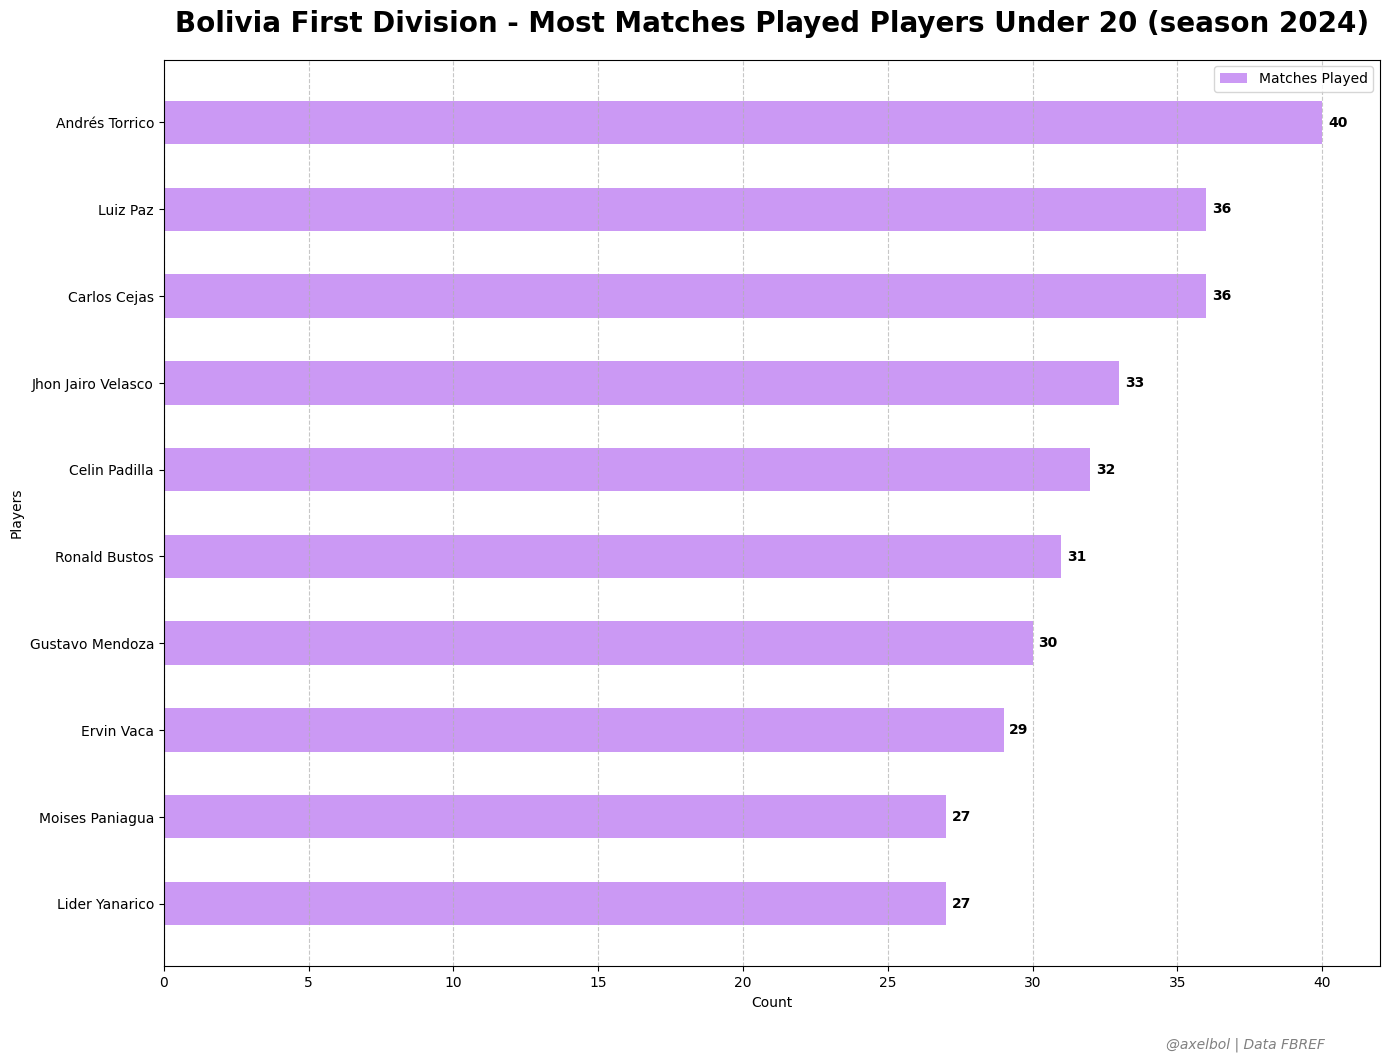

In [31]:
# Bar chart parameters
y = np.arange(len(df_sub20_mp['player']))  # Y-axis positions
width = 0.5  # Bar width

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Set background color to red
# fig.patch.set_facecolor('#55544f')  # Set figure background color
# ax.set_facecolor('#55544f')  # Set axes background color

# Create total matches played bars
bars1 = ax.barh(y, df_sub20_mp['mp'].values, width, label='Matches Played', color='#9934eb', alpha=0.5)

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title("Bolivia First Division - Most Matches Played Players Under 20 (season 2024)", color='black', fontsize=20, pad=20, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(df_sub20_mp['player'])
ax.legend()

# Invert y-axis to display the player with most matches at the top
ax.invert_yaxis()

# Display values next to bars
def add_labels(bars):
    for bar in bars:
        width = bar.get_width() + 0.2
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center', color='black', fontweight='bold')

add_labels(bars1)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add a footnote for PK reference
# fig.text(0.5, -0.05, "Note: PK refers to Penalty Kicks Made", ha='center', va='center', fontsize=10, color='gray', style='italic')

# Add Twitter handle at the bottom-right corner
fig.text(0.95, -0.05, "@axelbol | Data FBREF", ha='right', va='center', fontsize=10, color='gray', style='italic')

# Adjust layout to accommodate the footnote
plt.tight_layout(rect=[0, -0.03, 1, 1])  # Leave space at the bottom for the footnote

# Save the figure
plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)
plt.show()

Sort players by age | Sub 23

In [32]:
df_sub23 = df_copy_bol[(df_copy_bol['born'] >= 2001) & (df_copy_bol['born'] <= 2003)].reset_index(drop=True)
df_sub23.shape

(93, 23)

In [37]:
df_sub23['goals'].value_counts()

goals
0     61
1     17
2      5
11     2
8      2
7      2
3      2
6      1
4      1
Name: count, dtype: int64

Sub 23 | Squad with most goals

In [39]:
df_sub23.groupby(['squad'])['goals'].sum().sort_values(ascending=False)

squad
Always Ready             26
Wilstermann              12
Bolívar                   9
Aurora                    9
The Strongest             8
Royal Parí                7
FC Universitario          5
Oriente Petrolero         4
Real Tomayapo             4
Real Santa Cruz           3
Nacional Potosí           2
Indep Petrolero           2
San Antonio Bulo Bulo     2
Blooming                  1
Guabirá                   1
GV San José               0
Name: goals, dtype: int64

Get player with most goals of Always Ready | Sub 23

In [40]:
team_df = df_sub23[df_sub23['squad'] == 'Always Ready']
team_df

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
0,Carlos Abastoflor,bo BOL,MF,Always Ready,21.0,2002.0,4,2,140,1.6,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
12,José Briceño,bo BOL,FW,Always Ready,22.0,2002.0,30,20,1804,20.0,...,8,0,0,6,0,0.40,0.15,0.55,0.40,0.55
25,Walter Flores,bo BOL,FW,Always Ready,21.0,2003.0,2,2,163,1.8,...,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00
30,José Herrera,bo BOL,FW,Always Ready,20.0,2003.0,17,12,1063,11.8,...,0,0,0,1,0,0.00,0.08,0.08,0.00,0.08
41,José Martínes,bo BOL,FW,Always Ready,21.0,2002.0,29,23,1886,21.0,...,7,0,0,6,0,0.33,0.14,0.48,0.33,0.48
43,Diego Medina,bo BOL,DF,Always Ready,22.0,2002.0,34,30,2749,30.5,...,0,0,0,6,0,0.00,0.10,0.10,0.00,0.10
51,Ary Oliveira,bo BOL,MF,Always Ready,20.0,2003.0,4,2,171,1.9,...,0,0,0,0,0,0.00,0.53,0.53,0.00,0.53
62,Enzo Rodriguez,bo BOL,GK,Always Ready,20.0,2003.0,5,3,355,3.9,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
73,Marcelo Suarez,bo BOL,DF,Always Ready,22.0,2001.0,32,30,2722,30.2,...,0,0,0,14,2,0.00,0.03,0.03,0.00,0.03
74,Enrique Taborga,bo BOL,DF,Always Ready,21.0,2002.0,26,18,1511,16.8,...,0,0,0,4,0,0.00,0.12,0.12,0.00,0.12


In [41]:
team_sorted = team_df.sort_values(by='goals', ascending=False)
team_sorted

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
76,Robson Tomé,bo BOL,MF,Always Ready,21.0,2002.0,36,32,2869,31.9,...,8,3,3,4,1,0.35,0.13,0.47,0.25,0.38
12,José Briceño,bo BOL,FW,Always Ready,22.0,2002.0,30,20,1804,20.0,...,8,0,0,6,0,0.40,0.15,0.55,0.40,0.55
41,José Martínes,bo BOL,FW,Always Ready,21.0,2002.0,29,23,1886,21.0,...,7,0,0,6,0,0.33,0.14,0.48,0.33,0.48
25,Walter Flores,bo BOL,FW,Always Ready,21.0,2003.0,2,2,163,1.8,...,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00
0,Carlos Abastoflor,bo BOL,MF,Always Ready,21.0,2002.0,4,2,140,1.6,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
30,José Herrera,bo BOL,FW,Always Ready,20.0,2003.0,17,12,1063,11.8,...,0,0,0,1,0,0.00,0.08,0.08,0.00,0.08
43,Diego Medina,bo BOL,DF,Always Ready,22.0,2002.0,34,30,2749,30.5,...,0,0,0,6,0,0.00,0.10,0.10,0.00,0.10
62,Enzo Rodriguez,bo BOL,GK,Always Ready,20.0,2003.0,5,3,355,3.9,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
51,Ary Oliveira,bo BOL,MF,Always Ready,20.0,2003.0,4,2,171,1.9,...,0,0,0,0,0,0.00,0.53,0.53,0.00,0.53
73,Marcelo Suarez,bo BOL,DF,Always Ready,22.0,2001.0,32,30,2722,30.2,...,0,0,0,14,2,0.00,0.03,0.03,0.00,0.03


In [42]:
team_sorted[['player', 'goals']]

,player,goals
76,Robson Tomé,11
12,José Briceño,8
41,José Martínes,7
25,Walter Flores,0
0,Carlos Abastoflor,0
30,José Herrera,0
43,Diego Medina,0
62,Enzo Rodriguez,0
51,Ary Oliveira,0
73,Marcelo Suarez,0


Sub 23 | Squad with most assists

In [43]:
df_sub23.groupby(['squad'])['ast'].sum().sort_values(ascending=False)

squad
Always Ready             20
Oriente Petrolero        10
Bolívar                   8
Real Tomayapo             5
Wilstermann               5
The Strongest             5
Nacional Potosí           3
Real Santa Cruz           3
Blooming                  2
Aurora                    2
Indep Petrolero           2
FC Universitario          2
San Antonio Bulo Bulo     2
Royal Parí                2
Guabirá                   1
GV San José               0
Name: ast, dtype: int64

Get players of Always Ready with most assists

In [47]:
team_df = df_sub23[df_sub23['squad'] == 'Always Ready']
team_df

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
0,Carlos Abastoflor,bo BOL,MF,Always Ready,21.0,2002.0,4,2,140,1.6,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
12,José Briceño,bo BOL,FW,Always Ready,22.0,2002.0,30,20,1804,20.0,...,8,0,0,6,0,0.40,0.15,0.55,0.40,0.55
25,Walter Flores,bo BOL,FW,Always Ready,21.0,2003.0,2,2,163,1.8,...,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00
30,José Herrera,bo BOL,FW,Always Ready,20.0,2003.0,17,12,1063,11.8,...,0,0,0,1,0,0.00,0.08,0.08,0.00,0.08
41,José Martínes,bo BOL,FW,Always Ready,21.0,2002.0,29,23,1886,21.0,...,7,0,0,6,0,0.33,0.14,0.48,0.33,0.48
43,Diego Medina,bo BOL,DF,Always Ready,22.0,2002.0,34,30,2749,30.5,...,0,0,0,6,0,0.00,0.10,0.10,0.00,0.10
51,Ary Oliveira,bo BOL,MF,Always Ready,20.0,2003.0,4,2,171,1.9,...,0,0,0,0,0,0.00,0.53,0.53,0.00,0.53
62,Enzo Rodriguez,bo BOL,GK,Always Ready,20.0,2003.0,5,3,355,3.9,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
73,Marcelo Suarez,bo BOL,DF,Always Ready,22.0,2001.0,32,30,2722,30.2,...,0,0,0,14,2,0.00,0.03,0.03,0.00,0.03
74,Enrique Taborga,bo BOL,DF,Always Ready,21.0,2002.0,26,18,1511,16.8,...,0,0,0,4,0,0.00,0.12,0.12,0.00,0.12


In [48]:
team_sorted = team_df.sort_values(by='ast', ascending=False)
team_sorted

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
76,Robson Tomé,bo BOL,MF,Always Ready,21.0,2002.0,36,32,2869,31.9,...,8,3,3,4,1,0.35,0.13,0.47,0.25,0.38
41,José Martínes,bo BOL,FW,Always Ready,21.0,2002.0,29,23,1886,21.0,...,7,0,0,6,0,0.33,0.14,0.48,0.33,0.48
12,José Briceño,bo BOL,FW,Always Ready,22.0,2002.0,30,20,1804,20.0,...,8,0,0,6,0,0.40,0.15,0.55,0.40,0.55
43,Diego Medina,bo BOL,DF,Always Ready,22.0,2002.0,34,30,2749,30.5,...,0,0,0,6,0,0.00,0.10,0.10,0.00,0.10
74,Enrique Taborga,bo BOL,DF,Always Ready,21.0,2002.0,26,18,1511,16.8,...,0,0,0,4,0,0.00,0.12,0.12,0.00,0.12
81,Pablo Vaca,bo BOL,MF,Always Ready,21.0,2002.0,31,28,2376,26.4,...,0,0,0,5,0,0.00,0.04,0.04,0.00,0.04
73,Marcelo Suarez,bo BOL,DF,Always Ready,22.0,2001.0,32,30,2722,30.2,...,0,0,0,14,2,0.00,0.03,0.03,0.00,0.03
30,José Herrera,bo BOL,FW,Always Ready,20.0,2003.0,17,12,1063,11.8,...,0,0,0,1,0,0.00,0.08,0.08,0.00,0.08
51,Ary Oliveira,bo BOL,MF,Always Ready,20.0,2003.0,4,2,171,1.9,...,0,0,0,0,0,0.00,0.53,0.53,0.00,0.53
92,Alexandro Zenteno,bo BOL,MF,Always Ready,21.0,2003.0,4,3,208,2.3,...,0,0,0,0,0,0.00,0.43,0.43,0.00,0.43


In [49]:
team_sorted[['player', 'ast']]

,player,ast
76,Robson Tomé,4
41,José Martínes,3
12,José Briceño,3
43,Diego Medina,3
74,Enrique Taborga,2
81,Pablo Vaca,1
73,Marcelo Suarez,1
30,José Herrera,1
51,Ary Oliveira,1
92,Alexandro Zenteno,1


Sub 23 | GK

In [50]:
df_sub23['pos'].value_counts()

pos
MF    39
FW    23
DF    19
GK    12
Name: count, dtype: int64

In [62]:
df_gk_sub23 = df_sub23[df_sub23['pos'] == 'GK']
df_sorted_gk23 = df_gk_sub23.sort_values(by='mp', ascending=False)
df_sorted_gk23

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
24,Manuel Ferrel,bo BOL,GK,Guabirá,22.0,2001.0,30,30,2674,29.7,...,0,0,0,3,0,0.00,0.0,0.00,0.00,0.00
87,Jhunior Vera,bo BOL,GK,San Antonio Bulo Bulo,20.0,2003.0,27,27,2430,27.0,...,0,0,0,3,0,0.00,0.0,0.00,0.00,0.00
57,Bruno Poveda,bo BOL,GK,Wilstermann,20.0,2003.0,25,23,2143,23.8,...,0,0,0,4,0,0.00,0.0,0.00,0.00,0.00
2,Mauricio Adorno,bo BOL,GK,Nacional Potosí,22.0,2001.0,7,7,630,7.0,...,0,0,0,0,0,0.00,0.0,0.00,0.00,0.00
72,Fabricio Suárez,bo BOL,GK,Royal Parí,20.0,2003.0,7,2,182,2.0,...,1,0,0,1,0,0.49,0.0,0.49,0.49,0.49
35,Omar Ledezma,bo BOL,GK,Real Santa Cruz,20.0,2003.0,7,7,630,7.0,...,0,0,0,2,0,0.00,0.0,0.00,0.00,0.00
62,Enzo Rodriguez,bo BOL,GK,Always Ready,20.0,2003.0,5,3,355,3.9,...,0,0,0,0,0,0.00,0.0,0.00,0.00,0.00
10,Joel Bernal,bo BOL,GK,Oriente Petrolero,20.0,2003.0,5,5,450,5.0,...,0,0,0,0,0,0.00,0.0,0.00,0.00,0.00
32,Carlos Jiménez,bo BOL,GK,Blooming,22.0,2001.0,4,3,286,3.2,...,0,0,0,0,0,0.00,0.0,0.00,0.00,0.00
27,Paolo García,bo BOL,GK,FC Universitario,21.0,2002.0,3,3,270,3.0,...,0,0,0,0,0,0.00,0.0,0.00,0.00,0.00


Bar chart GK sub23

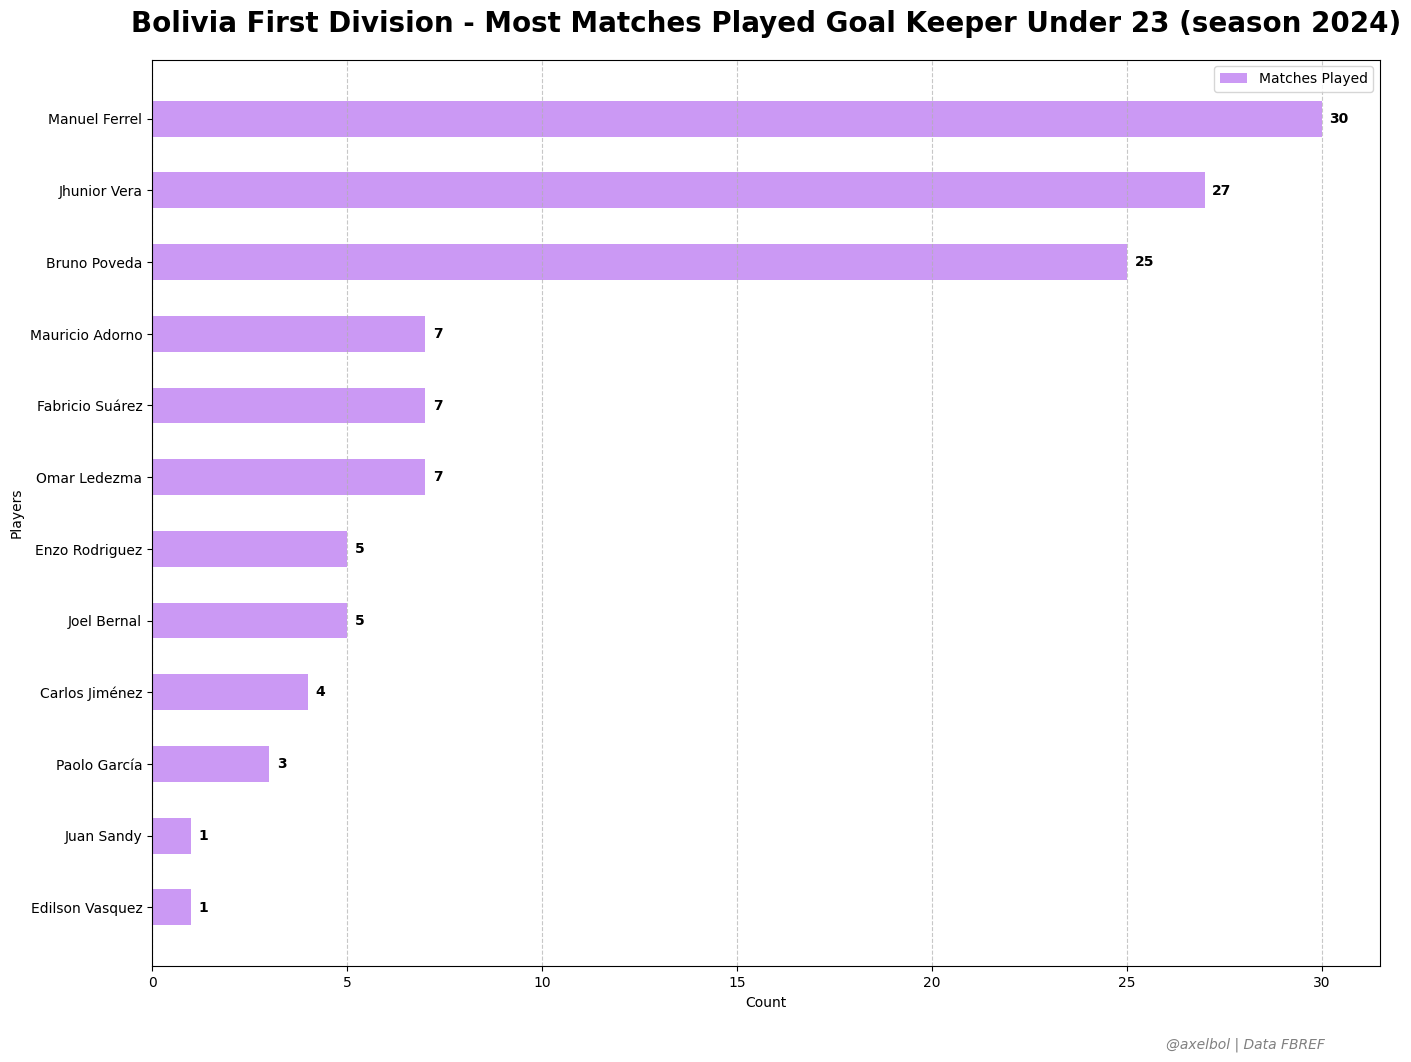

In [64]:
# Bar chart parameters
y = np.arange(len(df_sorted_gk23['player']))  # Y-axis positions
width = 0.5  # Bar width

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Set background color to red
# fig.patch.set_facecolor('#55544f')  # Set figure background color
# ax.set_facecolor('#55544f')  # Set axes background color

# Create total matches played bars
bars1 = ax.barh(y, df_sorted_gk23['mp'].values, width, label='Matches Played', color='#9934eb', alpha=0.5)

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title("Bolivia First Division - Most Matches Played Goal Keeper Under 23 (season 2024)", color='black', fontsize=20, pad=20, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(df_sorted_gk23['player'])
ax.legend()

# Invert y-axis to display the player with most matches at the top
ax.invert_yaxis()

# Display values next to bars
def add_labels(bars):
    for bar in bars:
        width = bar.get_width() + 0.2
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center', color='black', fontweight='bold')

add_labels(bars1)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add a footnote for PK reference
# fig.text(0.5, -0.05, "Note: PK refers to Penalty Kicks Made", ha='center', va='center', fontsize=10, color='gray', style='italic')

# Add Twitter handle at the bottom-right corner
fig.text(0.95, -0.05, "@axelbol | Data FBREF", ha='right', va='center', fontsize=10, color='gray', style='italic')

# Adjust layout to accommodate the footnote
plt.tight_layout(rect=[0, -0.03, 1, 1])  # Leave space at the bottom for the footnote

# Save the figure
plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)
plt.show()

Sub 23 Most Matches Played

In [65]:
df_sub23.sort_values(by=['mp'], ascending=False).head(20)

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
76,Robson Tomé,bo BOL,MF,Always Ready,21.0,2002.0,36,32,2869,31.9,...,8,3,3,4,1,0.35,0.13,0.47,0.25,0.38
43,Diego Medina,bo BOL,DF,Always Ready,22.0,2002.0,34,30,2749,30.5,...,0,0,0,6,0,0.00,0.10,0.10,0.00,0.10
63,César Romero,bo BOL,DF,Blooming,22.0,2001.0,33,28,2528,28.1,...,1,0,0,11,0,0.04,0.07,0.11,0.04,0.11
60,Yomar Rocha,bo BOL,DF,Bolívar,20.0,2003.0,33,26,2352,26.1,...,3,0,0,5,0,0.11,0.23,0.34,0.11,0.34
7,Sebastian Alvarez,bo BOL,DF,Oriente Petrolero,22.0,2001.0,33,31,2822,31.4,...,0,0,0,3,1,0.00,0.06,0.06,0.00,0.06
73,Marcelo Suarez,bo BOL,DF,Always Ready,22.0,2001.0,32,30,2722,30.2,...,0,0,0,14,2,0.00,0.03,0.03,0.00,0.03
37,José López,bo BOL,FW,Royal Parí,20.0,2003.0,32,20,1862,20.7,...,4,2,2,7,0,0.29,0.10,0.39,0.19,0.29
81,Pablo Vaca,bo BOL,MF,Always Ready,21.0,2002.0,31,28,2376,26.4,...,0,0,0,5,0,0.00,0.04,0.04,0.00,0.04
77,Mirko Tomianovic,bo BOL,MF,Real Tomayapo,22.0,2001.0,31,10,1435,15.9,...,1,0,0,5,0,0.06,0.06,0.13,0.06,0.13
18,Jeyson Chura,bo BOL,MF,The Strongest,21.0,2002.0,31,27,2262,25.1,...,7,0,0,6,0,0.28,0.04,0.32,0.28,0.32


Filter by age and goals | Between 22 and 32 | More than 5 Goals

In [15]:
#filter df by goals and age

df_filter_goals = df_copy_bol[(df_copy_bol['goals'] >= 5) & (df_copy_bol['age'] >= 22) & (df_copy_bol['age'] <= 32)].reset_index(drop=True)

In [16]:
df_filter_goals.shape

(44, 23)

In [70]:
df_filter_goals.sort_values(by='goals', ascending=False)

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
31,Daniel Passira,br BRA,MF,San Antonio Bulo Bulo,27.0,1996.0,39,36,3130,34.8,...,20,3,6,13,1,0.66,0.20,0.86,0.58,0.78
18,Juan Godoy,py PAR,MF,Indep Petrolero,30.0,1993.0,40,40,3425,38.1,...,19,3,3,10,0,0.58,0.05,0.63,0.50,0.55
3,Gilbert Álvarez,bo BOL,FW,Oriente Petrolero,31.0,1992.0,30,25,2341,26.0,...,13,3,4,8,1,0.62,0.27,0.88,0.50,0.77
38,Brian Sobrero,ar ARG,MF,GV San José,25.0,1998.0,35,29,2499,27.8,...,16,0,0,5,0,0.58,0.25,0.83,0.58,0.83
20,Miguel Graneros,ar ARG,FW,Real Tomayapo,27.0,1996.0,36,36,3108,34.5,...,13,2,3,6,0,0.43,0.14,0.58,0.38,0.52
26,Cesar Menacho,bo BOL,FW,Blooming,24.0,1999.0,36,33,2699,30.0,...,12,3,3,8,0,0.50,0.13,0.63,0.40,0.53
30,Felipe Pasadore,ar ARG,FW,San Antonio Bulo Bulo,23.0,2000.0,18,17,1438,16.0,...,14,0,0,5,1,0.88,0.25,1.13,0.88,1.13
27,Bruno Miranda,bo BOL,FW,The Strongest,25.0,1998.0,33,16,1470,16.3,...,10,2,3,3,0,0.73,0.12,0.86,0.61,0.73
25,Antonio Melgar,bo BOL,MF,Bolívar,29.0,1994.0,25,17,1498,16.6,...,9,2,2,3,0,0.66,0.30,0.96,0.54,0.84
8,Héctor Bobadilla,py PAR,FW,Wilstermann,22.0,2001.0,20,18,1491,16.6,...,11,0,0,4,1,0.66,0.24,0.91,0.66,0.91


Simple Bar chart


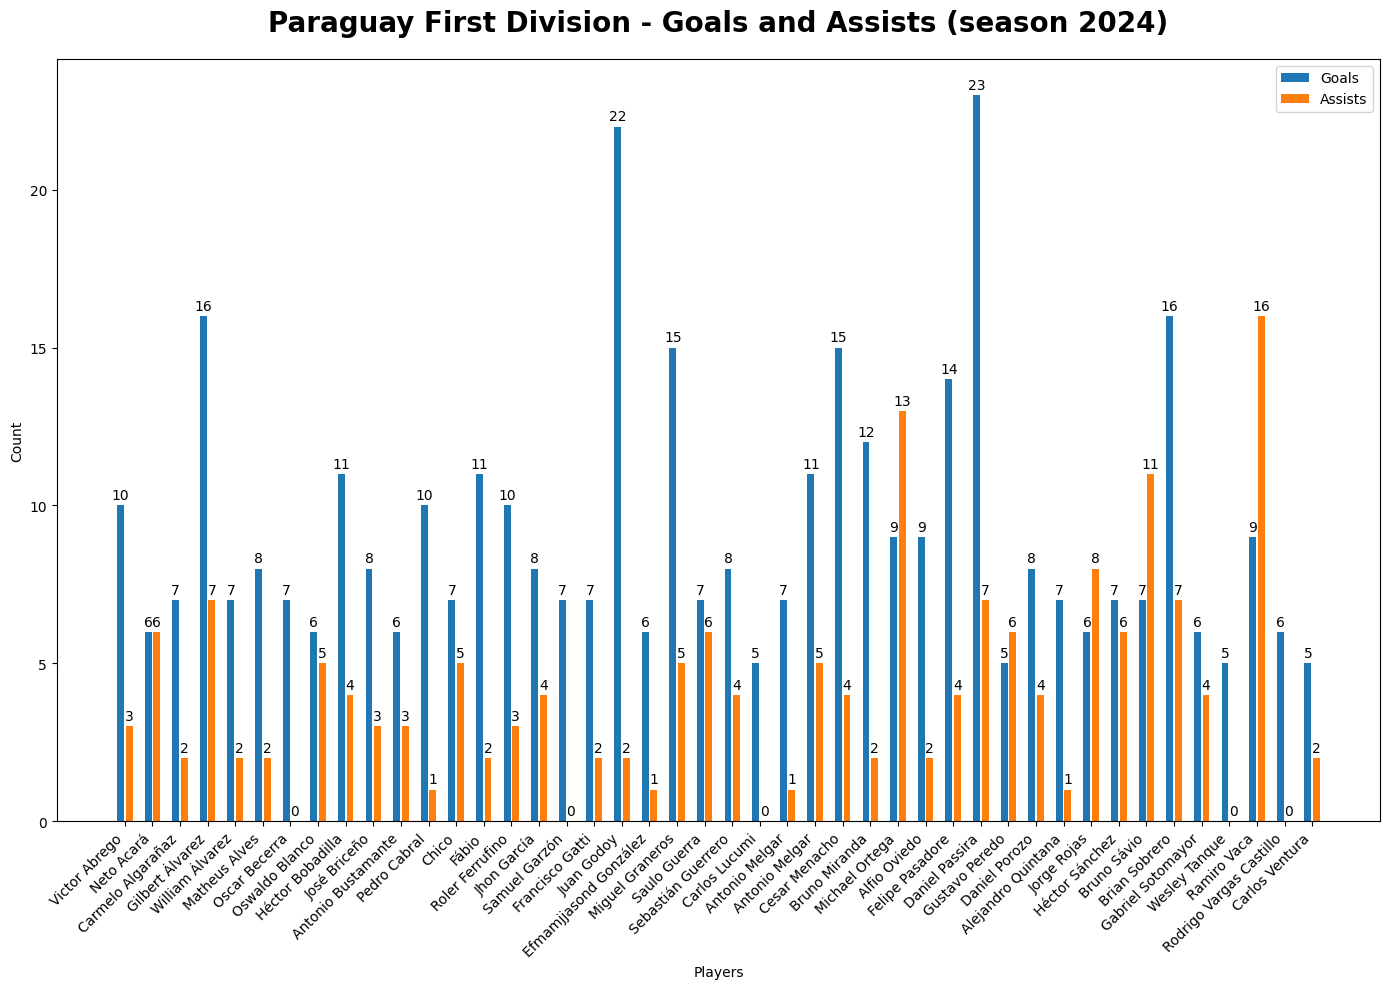

In [71]:
# Bar chart parameters
x = np.arange(len(df_filter_goals['player']))  # X-axis positions
width = 0.25  # Bar width

# Create the bar chart
fig, ax = plt.subplots(figsize=(14, 10))

offset = 0.03
bars1 = ax.bar(x - (width/2 + offset), df_filter_goals['goals'], width, label='Goals', color='#1f77b4')
bars2 = ax.bar(x + (width/2 + offset), df_filter_goals['ast'], width, label='Assists', color='#ff7f0e')

# Add labels, title, and legend
ax.set_xlabel('Players')
ax.set_ylabel('Count')
ax.set_title("Paraguay First Division - Goals and Assists (season 2024)", color='black', fontsize=20, pad=20, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df_filter_goals['player'])
ax.legend()

# Display values on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height() + 0.1
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.xticks(rotation=45, ha='right')

# Show the chart
plt.tight_layout()

# CHANGE THIS TO YOUR PATH
# plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)
plt.show()

Bar chart 5 most goals Player names in other color

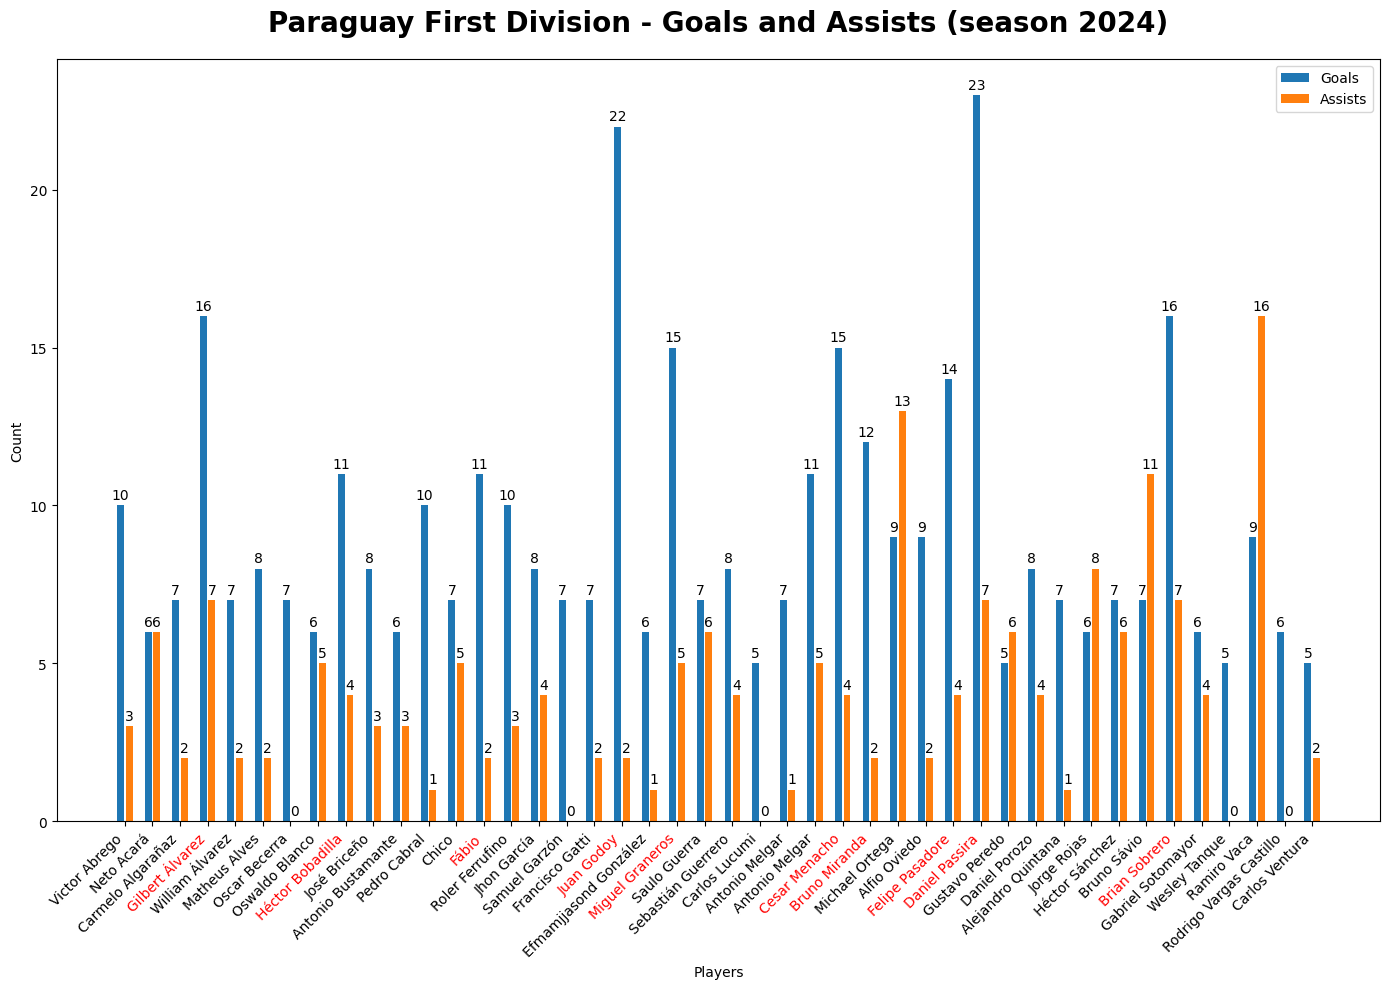

In [72]:
# Get top 5 players by goals
top5_players = df_filter_goals.nlargest(10, 'goals')['player'].tolist()

# Bar chart parameters
x = np.arange(len(df_filter_goals['player']))  # X-axis positions
width = 0.25  # Bar width

# Create the bar chart
fig, ax = plt.subplots(figsize=(14, 10))

offset = 0.03
bars1 = ax.bar(x - (width/2 + offset), df_filter_goals['goals'], width, label='Goals', color='#1f77b4')
bars2 = ax.bar(x + (width/2 + offset), df_filter_goals['ast'], width, label='Assists', color='#ff7f0e')

# Add labels, title, and legend
ax.set_xlabel('Players')
ax.set_ylabel('Count')
ax.set_title("Bolivia First Division - Goals and Assists (season 2024)", color='black', fontsize=20, pad=20, fontweight='bold')
ax.set_xticks(x)

# Set player names with different colors
player_names = df_filter_goals['player']
tick_labels = ax.set_xticklabels(player_names, rotation=45, ha='right')

# Change color of top 5 players' with most goals
for tick in tick_labels:
    if tick.get_text() in top5_players:
        tick.set_color('red')

ax.legend()

# Display values on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height() + 0.1
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Show the chart
plt.tight_layout()

# CHANGE THIS TO YOUR PATH
# plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)
plt.show()

Horizontal Bar chart 

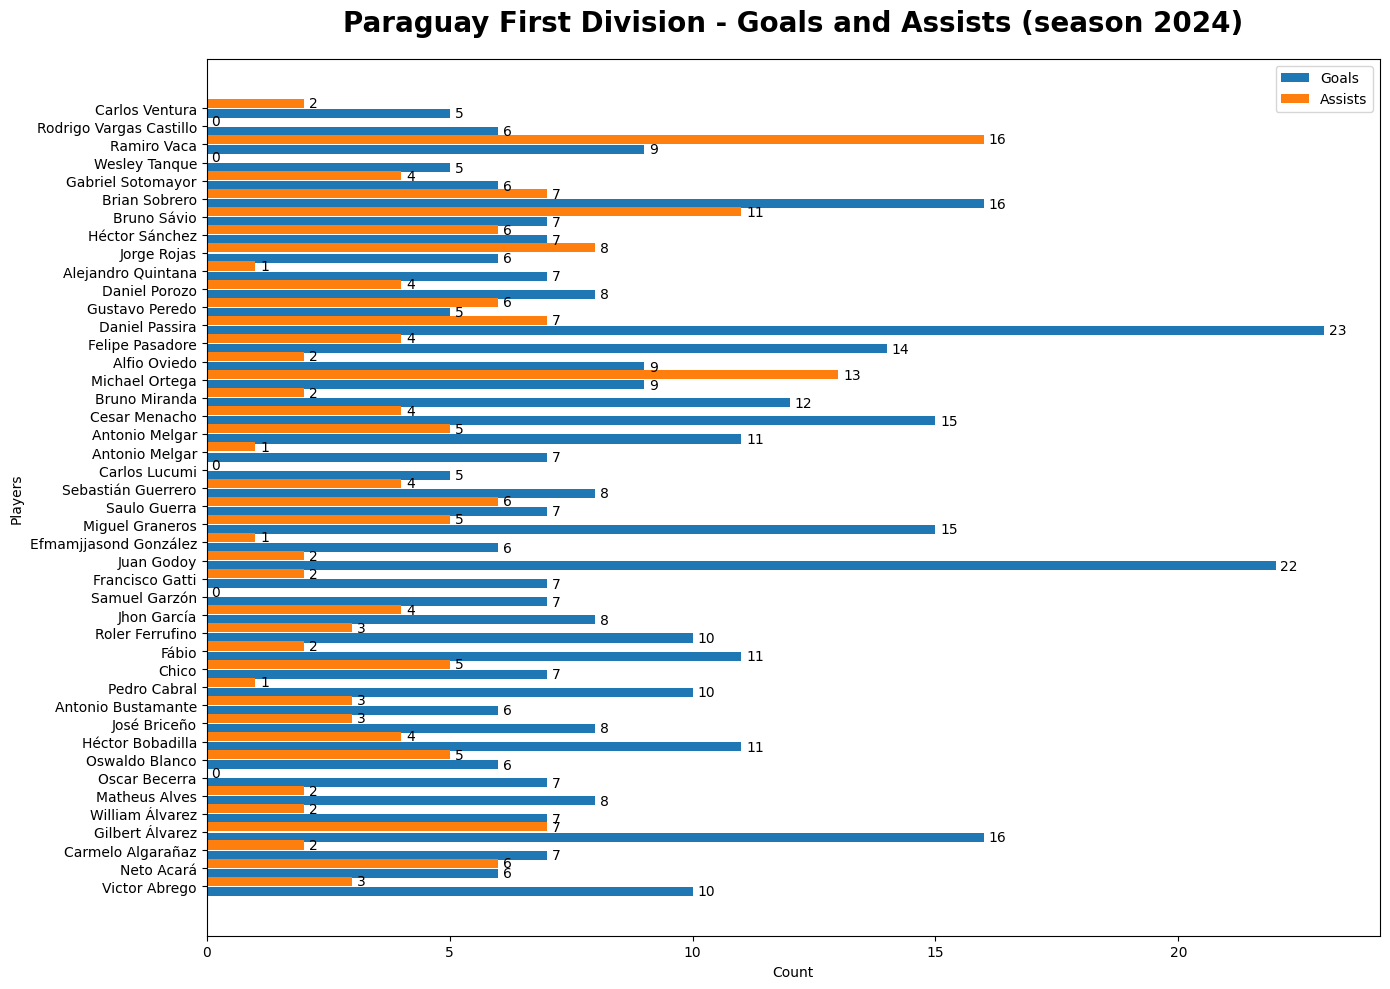

In [76]:
# Bar chart parameters
y = np.arange(len(df_filter_goals['player']))  # Y-axis positions
width = 0.5  # Bar width

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))
offset = 0.03
bars1 = ax.barh(y - (width/2 + offset), df_filter_goals['goals'], width, label='Goals', color='#1f77b4')
bars2 = ax.barh(y + (width/2 + offset), df_filter_goals['ast'], width, label='Assists', color='#ff7f0e')

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title("Paraguay First Division - Goals and Assists (season 2024)", color='black', fontsize=20, pad=20, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(df_filter_goals['player'])
ax.legend()

# Display values on top of bars
def add_labels(bars):
    for bar in bars:
        width = bar.get_width() + 0.1
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center')

add_labels(bars1)
add_labels(bars2)

# Adjust layout for better fit
plt.tight_layout()
# CHANGE THIS TO YOUR PATH
plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)
plt.show()

Horizontal bar chart | sort by goals

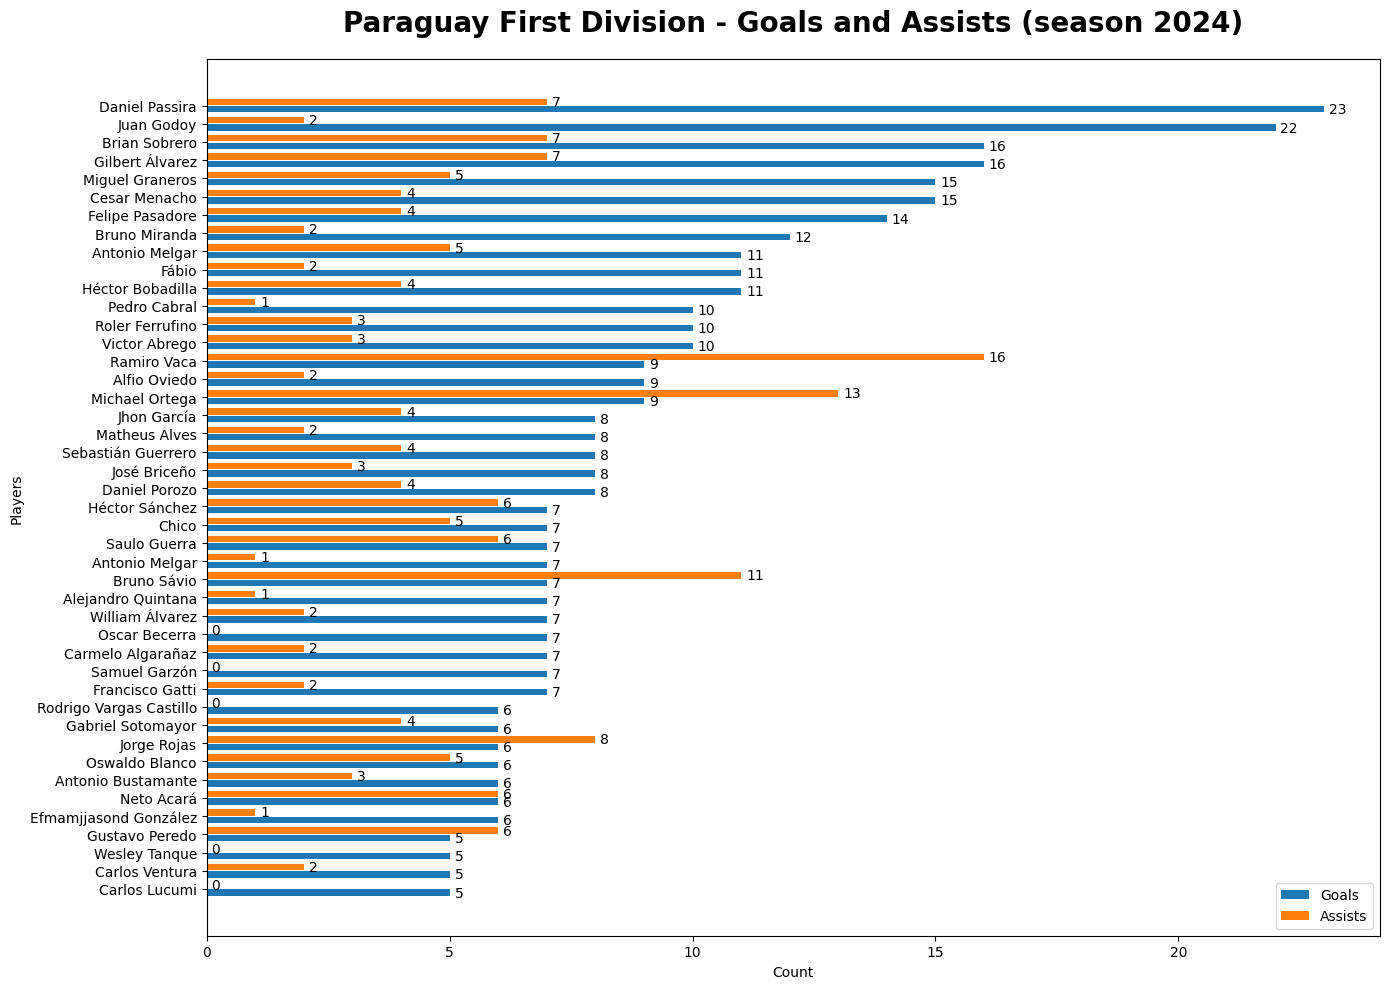

In [74]:
# Sort by goals (optional)
df = df_filter_goals.sort_values(by='goals', ascending=True)

# Bar chart parameters
y = np.arange(len(df_filter_goals['player']))  # Y-axis positions
width = 0.35  # Bar width

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))
offset = 0.03
bars1 = ax.barh(y - (width/2 + offset), df['goals'], width, label='Goals', color='#1f77b4')
bars2 = ax.barh(y + (width/2 + offset), df['ast'], width, label='Assists', color='#ff7f0e')

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title("Paraguay First Division - Goals and Assists (season 2024)", color='black', fontsize=20, pad=20, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(df['player'])
ax.legend()

# Display values on top of bars
def add_labels(bars):
    for bar in bars:
        width = bar.get_width() + 0.1
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center')

add_labels(bars1)
add_labels(bars2)

# Adjust layout for better fit
plt.tight_layout()
# CHANGE THIS TO YOUR PATH
plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)
plt.show()

Top 10 bar chart

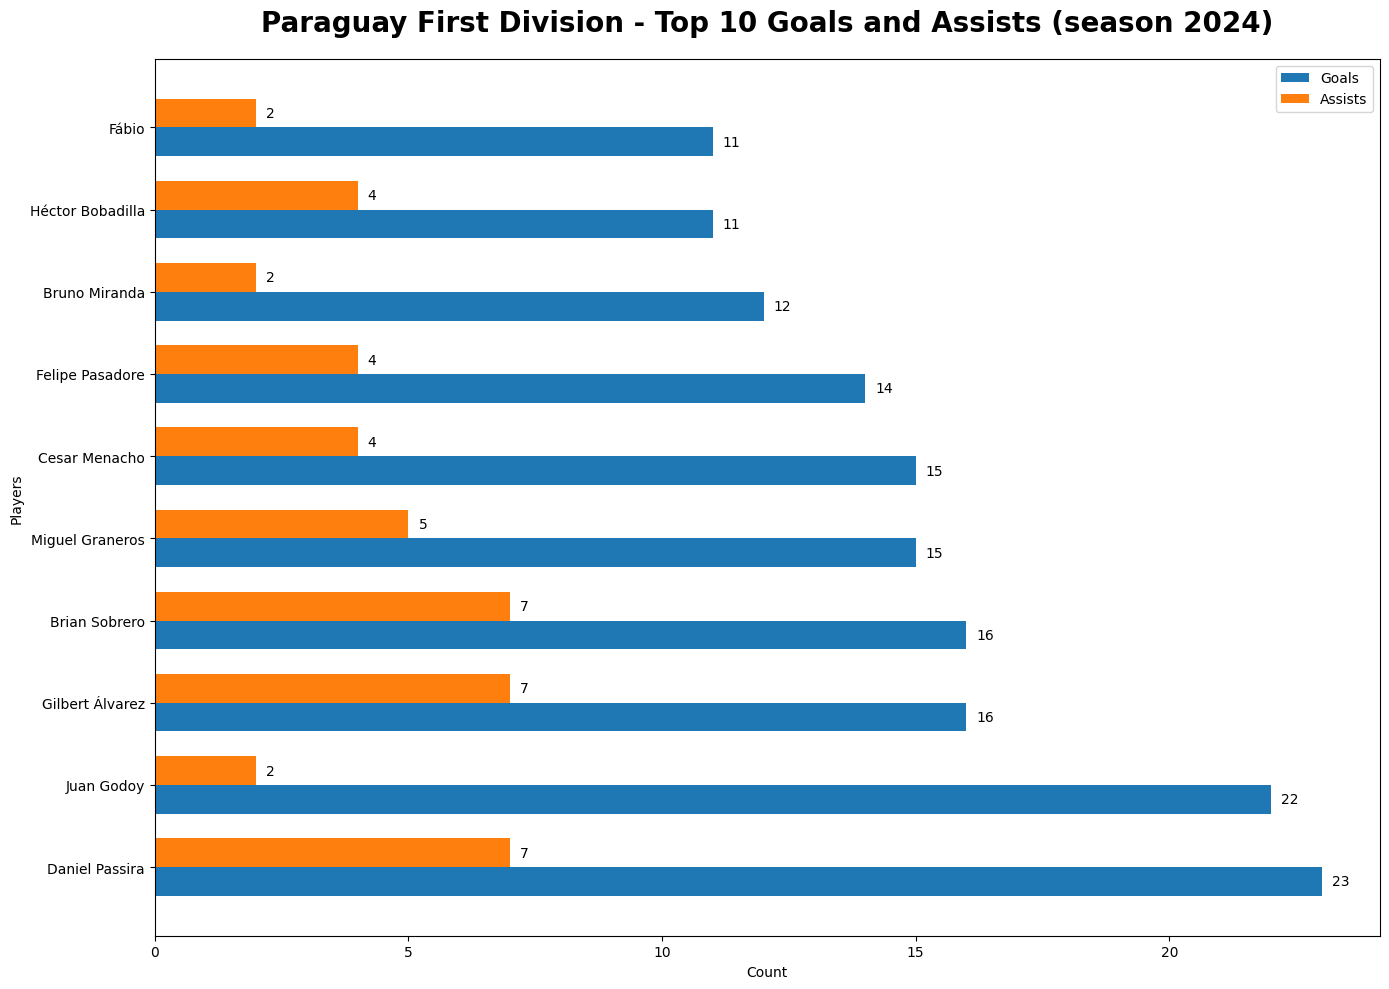

In [75]:
# Filter the top 10 players with the most goals
df_top10 = df_filter_goals.nlargest(10, 'goals')

# Bar chart parameters
y = np.arange(len(df_top10['player']))  # Y-axis positions
width = 0.35  # Bar width

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))
bars1 = ax.barh(y - width/2, df_top10['goals'], width, label='Goals', color='#1f77b4')
bars2 = ax.barh(y + width/2, df_top10['ast'], width, label='Assists', color='#ff7f0e')

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title("Paraguay First Division - Top 10 Goals and Assists (season 2024)", color='black', fontsize=20, pad=20, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(df_top10['player'])
ax.legend()

# Display values next to bars
def add_labels(bars):
    for bar in bars:
        width = bar.get_width() + 0.2
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center')

add_labels(bars1)
add_labels(bars2)

# Adjust layout for better fit
plt.tight_layout()
# CHANGE THIS TO YOUR PATH
plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)
plt.show()

Show info only for top 10 players

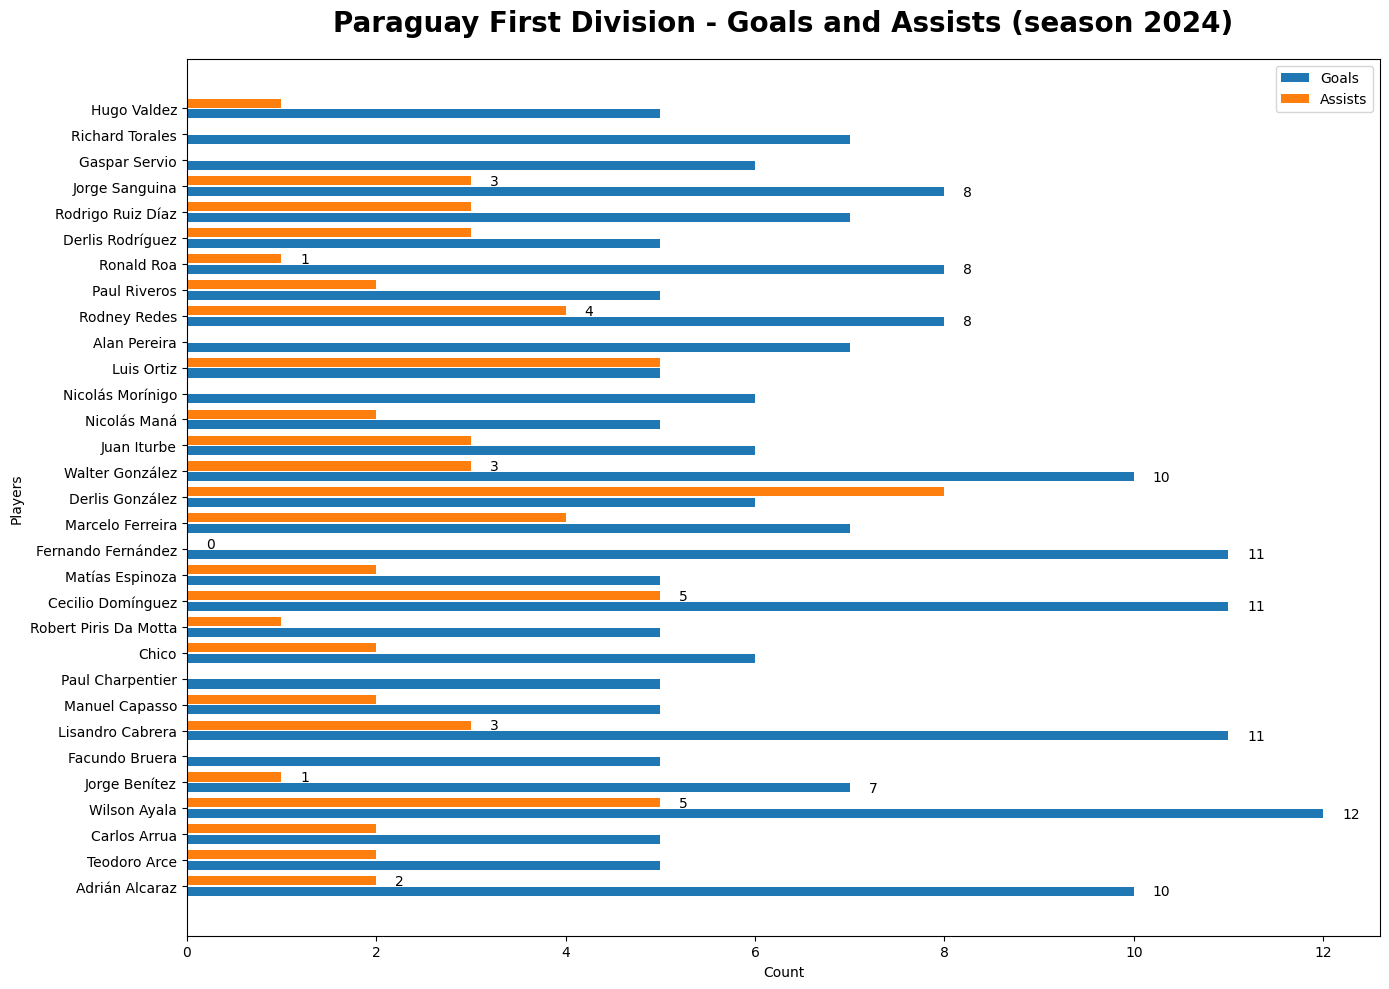

In [10]:
# Identify the top 10 players with the most goals
top10_players = df_filter_goals.nlargest(10, 'goals')['player'].tolist()

# Bar chart parameters
y = np.arange(len(df_filter_goals['player']))  # Y-axis positions
width = 0.35  # Bar width

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))
offset = 0.03
bars1 = ax.barh(y - (width/2 + offset), df_filter_goals['goals'], width, label='Goals', color='#1f77b4')
bars2 = ax.barh(y + (width/2 + offset), df_filter_goals['ast'], width, label='Assists', color='#ff7f0e')

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title("Paraguay First Division - Goals and Assists (season 2024)", color='black', fontsize=20, pad=20, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(df_filter_goals['player'])
ax.legend()

# Display values only for top 10 players
def add_labels(bars, metric):
    for bar, name in zip(bars, df_filter_goals['player']):
        if name in top10_players:  # Add values only for top 10 players
            value = int(bar.get_width())
            ax.text(value + 0.2, bar.get_y() + bar.get_height()/2, f'{value}', ha='left', va='center')

add_labels(bars1, 'goals')
add_labels(bars2, 'assists')

# Adjust layout for better fit
plt.tight_layout()
# CHANGE THIS TO YOUR PATH
plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)
plt.show()

Claude | top 3 bar with different color

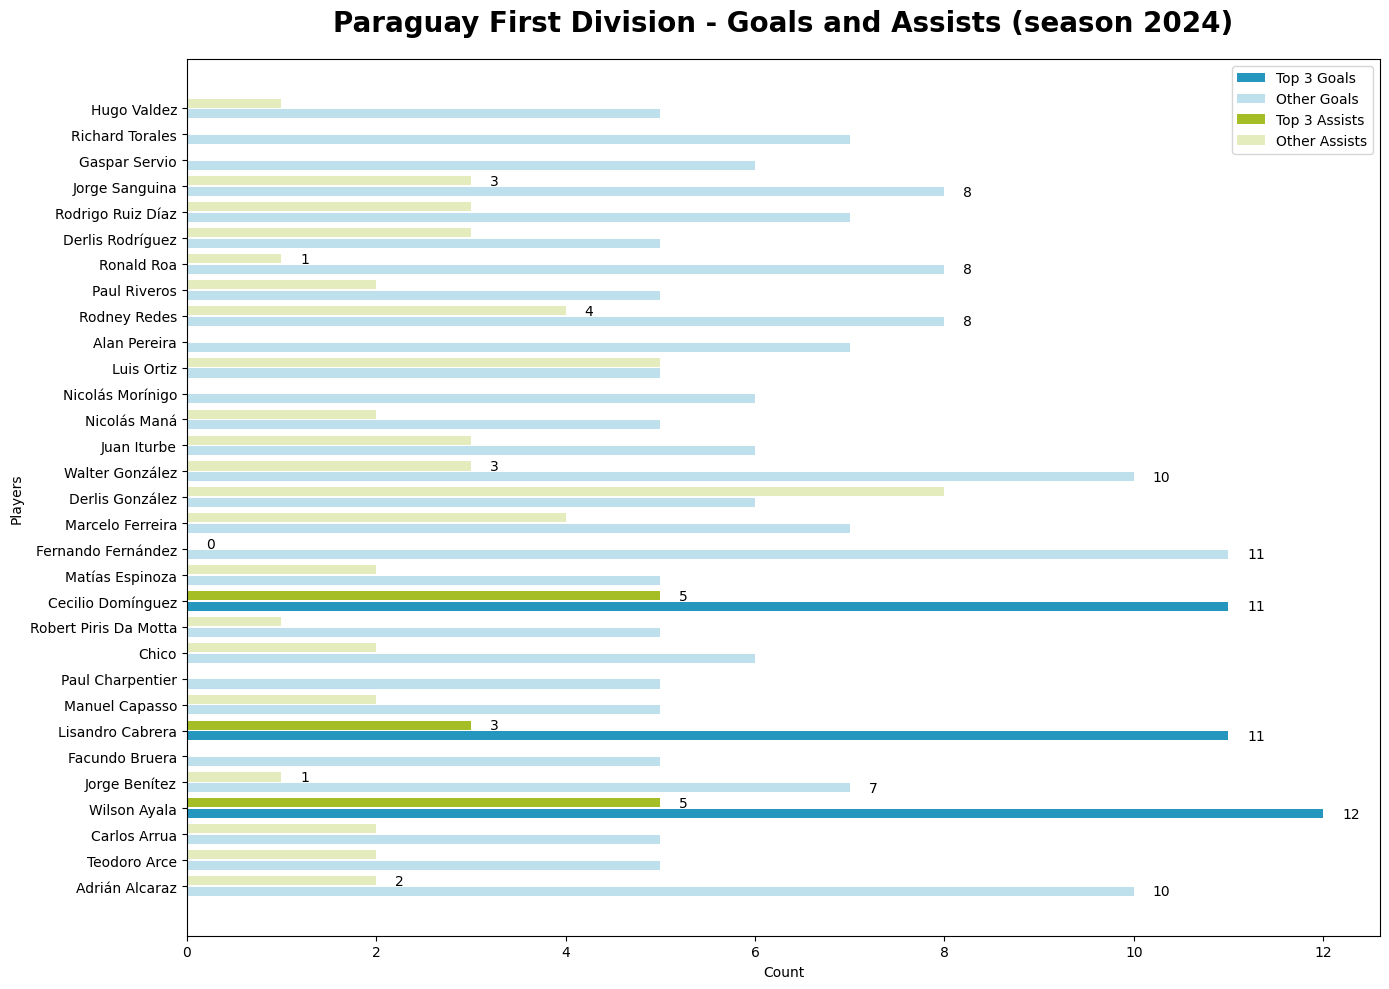

In [26]:
# Identify the top 10 and top 3 players with the most goals
top10_players = df_filter_goals.nlargest(10, 'goals')['player'].tolist()
top3_players = df_filter_goals.nlargest(3, 'goals')['player'].tolist()

# Bar chart parameters
y = np.arange(len(df_filter_goals['player']))  # Y-axis positions
width = 0.35  # Bar width

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))
offset = 0.03

# Create color lists for goals and assists
goals_colors = ['#2596be' if player in top3_players else '#bee0ec' for player in df_filter_goals['player']]
assists_colors = ['#a5be25' if player in top3_players else '#e4ecbe' for player in df_filter_goals['player']]

# Create bars with different colors
bars1 = ax.barh(y - (width/2 + offset), df_filter_goals['goals'], width, label='Goals', color=goals_colors)
bars2 = ax.barh(y + (width/2 + offset), df_filter_goals['ast'], width, label='Assists', color=assists_colors)

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title("Paraguay First Division - Goals and Assists (season 2024)", color='black', fontsize=20, pad=20, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(df_filter_goals['player'])

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2596be', label='Top 3 Goals'),
    Patch(facecolor='#bee0ec', label='Other Goals'),
    Patch(facecolor='#a5be25', label='Top 3 Assists'),
    Patch(facecolor='#e4ecbe', label='Other Assists')
]
ax.legend(handles=legend_elements)

# Display values only for top 10 players
def add_labels(bars, metric):
    for bar, name in zip(bars, df_filter_goals['player']):
        if name in top10_players:  # Add values only for top 10 players
            value = int(bar.get_width())
            ax.text(value + 0.2, bar.get_y() + bar.get_height()/2, f'{value}', ha='left', va='center')

add_labels(bars1, 'goals')
add_labels(bars2, 'assists')

# Adjust layout for better fit
plt.tight_layout()
plt.show()

Claude | Goals and Assists stacked bar | Goals LEFT & Assists RIGHT

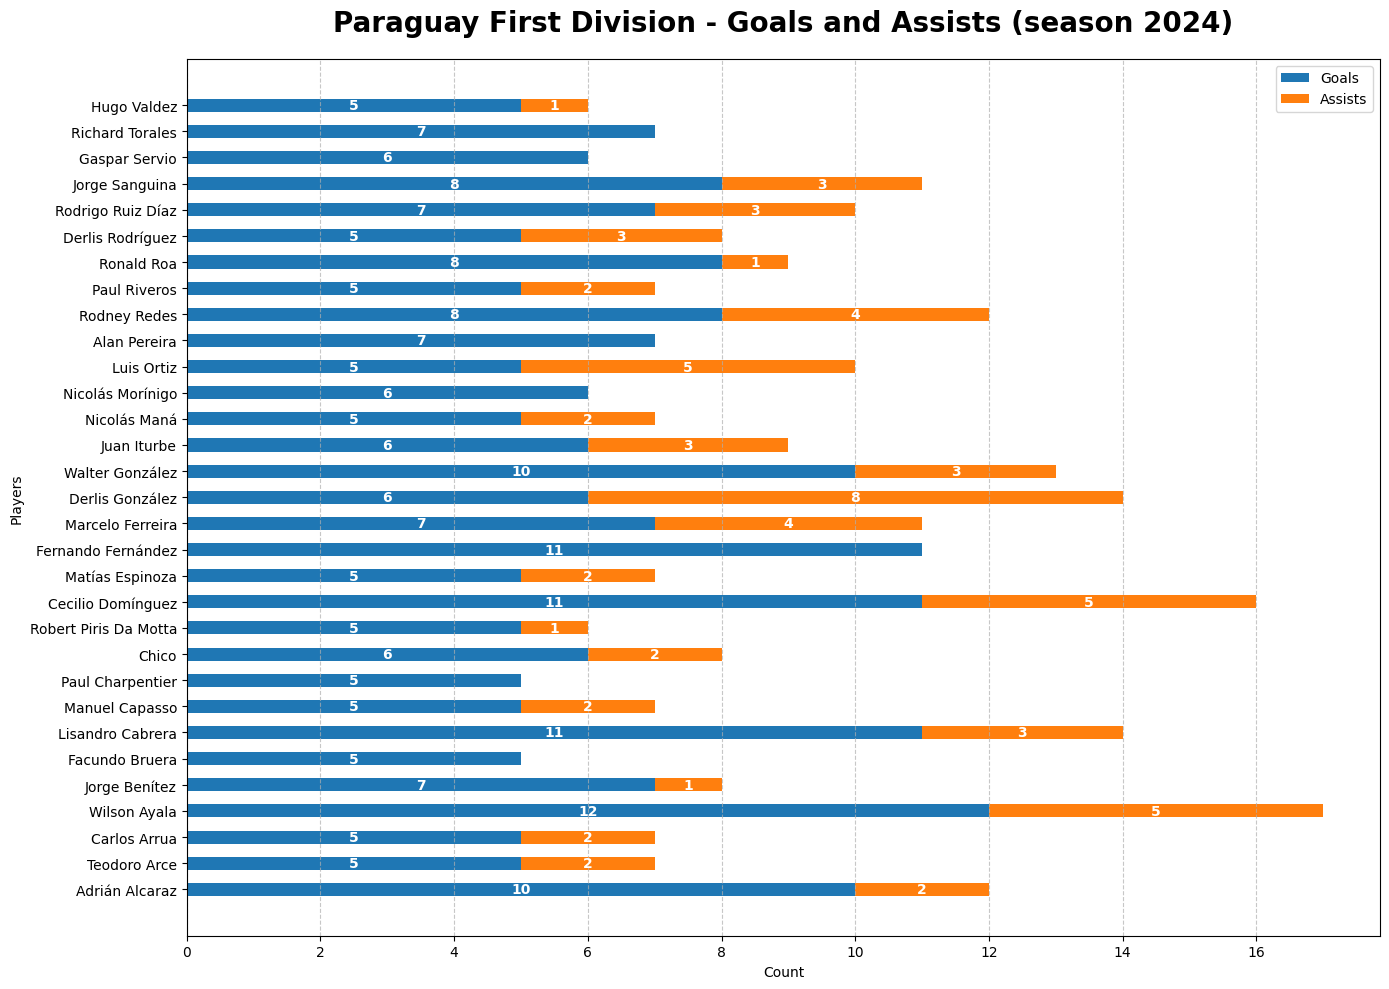

In [16]:
# Convert columns to numeric type explicitly
df_filter_goals['goals'] = pd.to_numeric(df_filter_goals['goals'], errors='coerce')
df_filter_goals['ast'] = pd.to_numeric(df_filter_goals['ast'], errors='coerce')

# Bar chart parameters
y = np.arange(len(df_filter_goals['player']))  # Y-axis positions
width = 0.5  # Bar width

# Create the horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Create stacked bars
bars1 = ax.barh(y, df_filter_goals['goals'].values, width, label='Goals', color='#1f77b4')
bars2 = ax.barh(y, df_filter_goals['ast'].values, width, left=df_filter_goals['goals'].values, label='Assists', color='#ff7f0e')

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title("Paraguay First Division - Goals and Assists (season 2024)", color='black', fontsize=20, pad=20, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(df_filter_goals['player'])
ax.legend()

# Display values on the bars
for idx, (goals, assists) in enumerate(zip(df_filter_goals['goals'], df_filter_goals['ast'])):
    # Add goals label
    if goals > 0:
        ax.text(goals/2, idx, f'{int(goals)}', ha='center', va='center', color='white', fontweight='bold')

    # Add assists label
    if assists > 0:
        ax.text(goals + assists/2, idx, f'{int(assists)}', ha='center', va='center', color='white', fontweight='bold')

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better fit
plt.tight_layout()

# Save the figure
# plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)
plt.show()

Claude | Goals and Assists stacked bar | Assists LEFT & Goals RIGHT

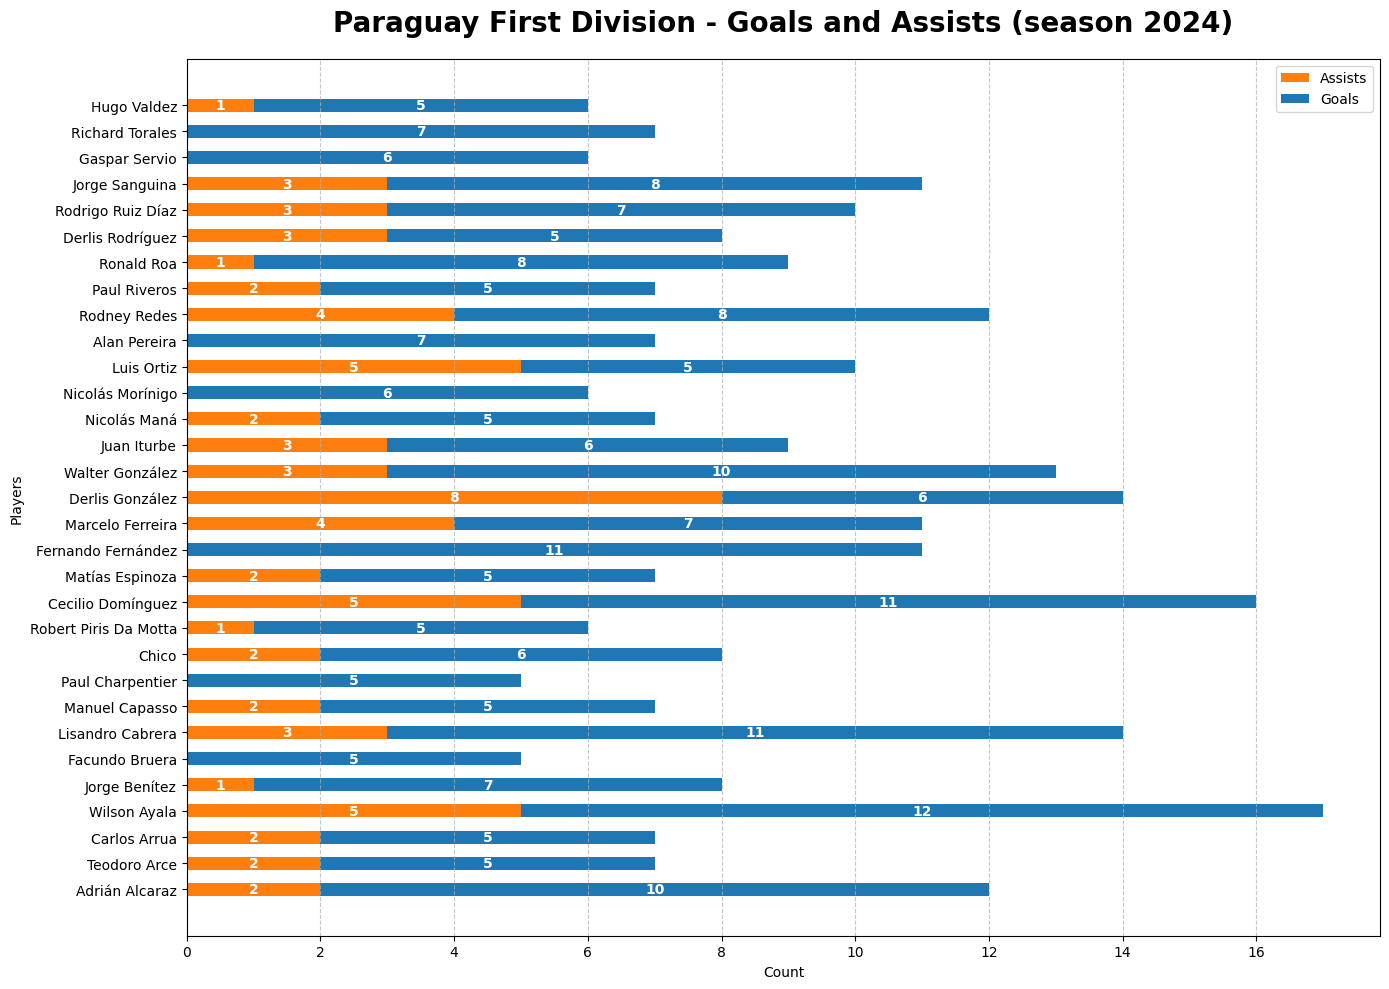

In [17]:
# Convert columns to numeric type explicitly
df_filter_goals['goals'] = pd.to_numeric(df_filter_goals['goals'], errors='coerce')
df_filter_goals['ast'] = pd.to_numeric(df_filter_goals['ast'], errors='coerce')

# Bar chart parameters
y = np.arange(len(df_filter_goals['player']))  # Y-axis positions
width = 0.5  # Bar width

# Create the horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Create stacked bars - assists first, then goals
bars1 = ax.barh(y, df_filter_goals['ast'].values, width, label='Assists', color='#ff7f0e')
bars2 = ax.barh(y, df_filter_goals['goals'].values, width, left=df_filter_goals['ast'].values, label='Goals', color='#1f77b4')

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title("Paraguay First Division - Goals and Assists (season 2024)", color='black', fontsize=20, pad=20, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(df_filter_goals['player'])
ax.legend()

# Display values on the bars
for idx, (assists, goals) in enumerate(zip(df_filter_goals['ast'], df_filter_goals['goals'])):
    # Add assists label
    if assists > 0:
        ax.text(assists/2, idx, f'{int(assists)}', ha='center', va='center', color='white', fontweight='bold')

    # Add goals label
    if goals > 0:
        ax.text(assists + goals/2, idx, f'{int(goals)}', ha='center', va='center', color='white', fontweight='bold')

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better fit
plt.tight_layout()

# Save the figure
# plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)
plt.show()

Claude | A bar within a bar | PK at the end of the bar

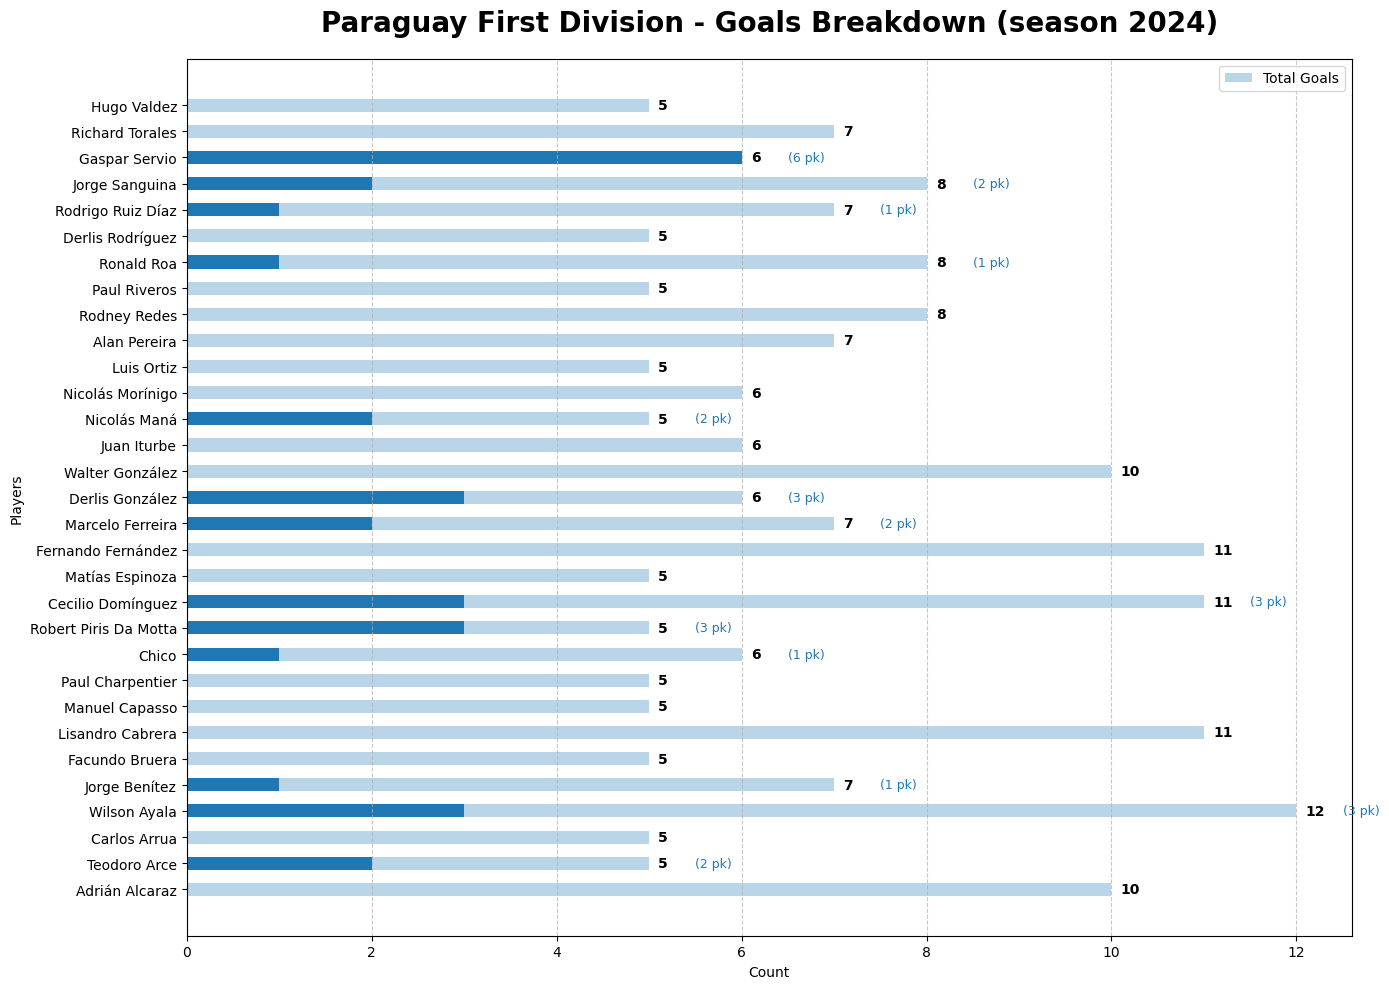

In [20]:
# Convert columns to numeric type explicitly
df_filter_goals['goals'] = pd.to_numeric(df_filter_goals['goals'], errors='coerce')
df_filter_goals['pk'] = pd.to_numeric(df_filter_goals['pk'], errors='coerce')

# Bar chart parameters
y = np.arange(len(df_filter_goals['player']))  # Y-axis positions
width = 0.5  # Bar width

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Create total goals bars
bars1 = ax.barh(y, df_filter_goals['goals'].values, width, label='Total Goals', color='#1f77b4', alpha=0.3)

# Create penalty goals bars (at the beginning of the total goals bars)
for idx, (goals, pks) in enumerate(zip(df_filter_goals['goals'], df_filter_goals['pk'])):
    if pks > 0:  # Only create penalty bar if there are penalty goals
        ax.barh(y[idx],
                pks,
                width,
                left=0,  # Start from the beginning
                label='Penalty Goals' if idx == 0 else "", # Add label only once
                color='#1f77b4'
            )

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title("Paraguay First Division - Goals Breakdown (season 2024)", color='black', fontsize=20, pad=20, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(df_filter_goals['player'])
ax.legend()

# Display values on the bars
for idx, (goals, pks) in enumerate(zip(df_filter_goals['goals'], df_filter_goals['pk'])):
    if goals > 0:
        # Show total goals at the end of the bar
        ax.text(goals + 0.1, idx, f'{int(goals)}', ha='left', va='center', color='black', fontweight='bold')

        # Show penalty goals in parentheses if any
        if pks > 0:
            ax.text(goals + 0.5, idx, f'({int(pks)} pk)', ha='left', va='center', color='#1f77b4', fontsize=9)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better fit
plt.tight_layout()

# Save the figure
plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)
plt.show()

Claude | A bar within a bar | PK at the middle of the bar

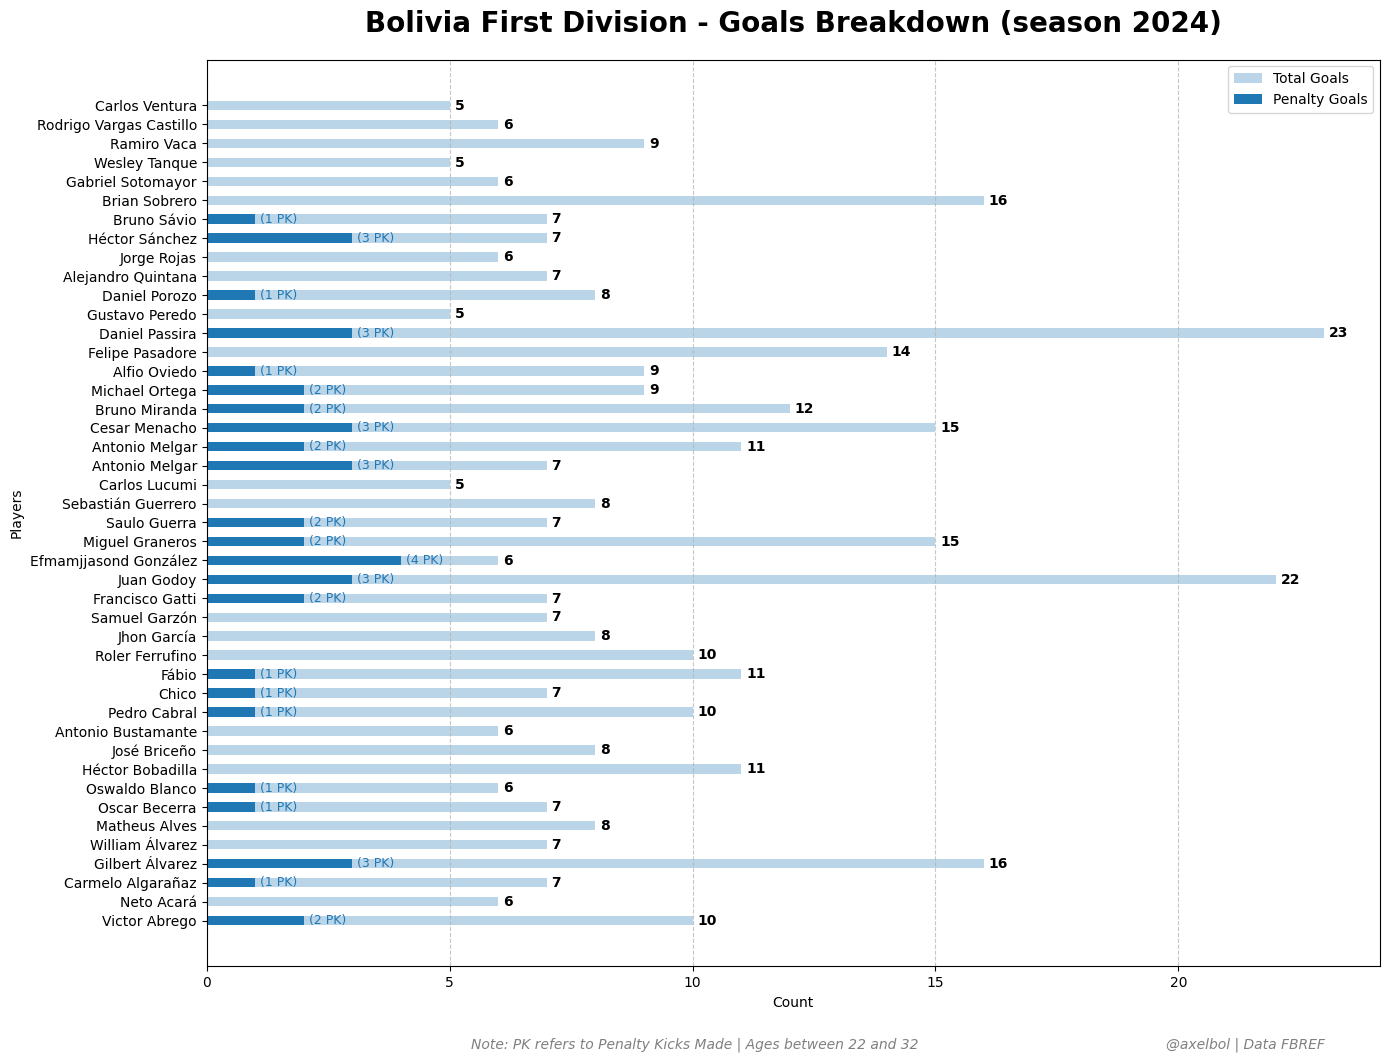

In [47]:
# Convert columns to numeric type explicitly
df_filter_goals['goals'] = pd.to_numeric(df_filter_goals['goals'], errors='coerce')
df_filter_goals['pk'] = pd.to_numeric(df_filter_goals['pk'], errors='coerce')

# Bar chart parameters
y = np.arange(len(df_filter_goals['player']))  # Y-axis positions
width = 0.5  # Bar width

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Create total goals bars
bars1 = ax.barh(y, df_filter_goals['goals'].values, width, label='Total Goals', color='#1f77b4', alpha=0.3)

# Create penalty goals bars (at the beginning of the total goals bars)
for idx, (goals, pks) in enumerate(zip(df_filter_goals['goals'], df_filter_goals['pk'])):
    if pks > 0:  # Only create penalty bar if there are penalty goals
        ax.barh(y[idx],
                pks,
                width,
                left=0,  # Start from the beginning
                label='Penalty Goals' if idx == 0 else "", # Add label only once
                color='#1f77b4'
            )

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title("Bolivia First Division - Goals Breakdown (season 2024)", color='black', fontsize=20, pad=20, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(df_filter_goals['player'])
ax.legend()

# Display values on the bars
for idx, (goals, pks) in enumerate(zip(df_filter_goals['goals'], df_filter_goals['pk'])):
    if goals > 0:
        # Handle cases where all goals are penalty goals
        if goals == pks:
            # Show total goals slightly offset to the right
            ax.text(goals + 0.1, idx, f'{int(goals)}', ha='left', va='bottom', color='black', fontweight='bold')
            # Show penalty goals below
            ax.text(pks + 0.1, idx, f'({int(pks)} PK)', ha='left', va='top', color='#1f77b4', fontsize=9)
        else:
            # Normal case: show total goals at the end
            ax.text(goals + 0.1, idx, f'{int(goals)}', ha='left', va='center', color='black', fontweight='bold')
            # Show penalty goals after the penalty section if any
            if pks > 0:
                ax.text(pks + 0.1, idx, f'({int(pks)} PK)', ha='left', va='center', color='#1f77b4', fontsize=9)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better fit
plt.tight_layout()

# Add a footnote for PK reference
fig.text(0.5, -0.05, "Note: PK refers to Penalty Kicks Made | Ages between 22 and 32", ha='center', va='center', fontsize=10, color='gray', style='italic')

# Add Twitter handle at the bottom-right corner
fig.text(0.95, -0.05, "@axelbol | Data FBREF", ha='right', va='center', fontsize=10, color='gray', style='italic')

# Adjust layout to accommodate the footnote
plt.tight_layout(rect=[0, -0.03, 1, 1])  # Leave space at the bottom for the footnote

# Save the figure
plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)
plt.show()

Only show goals

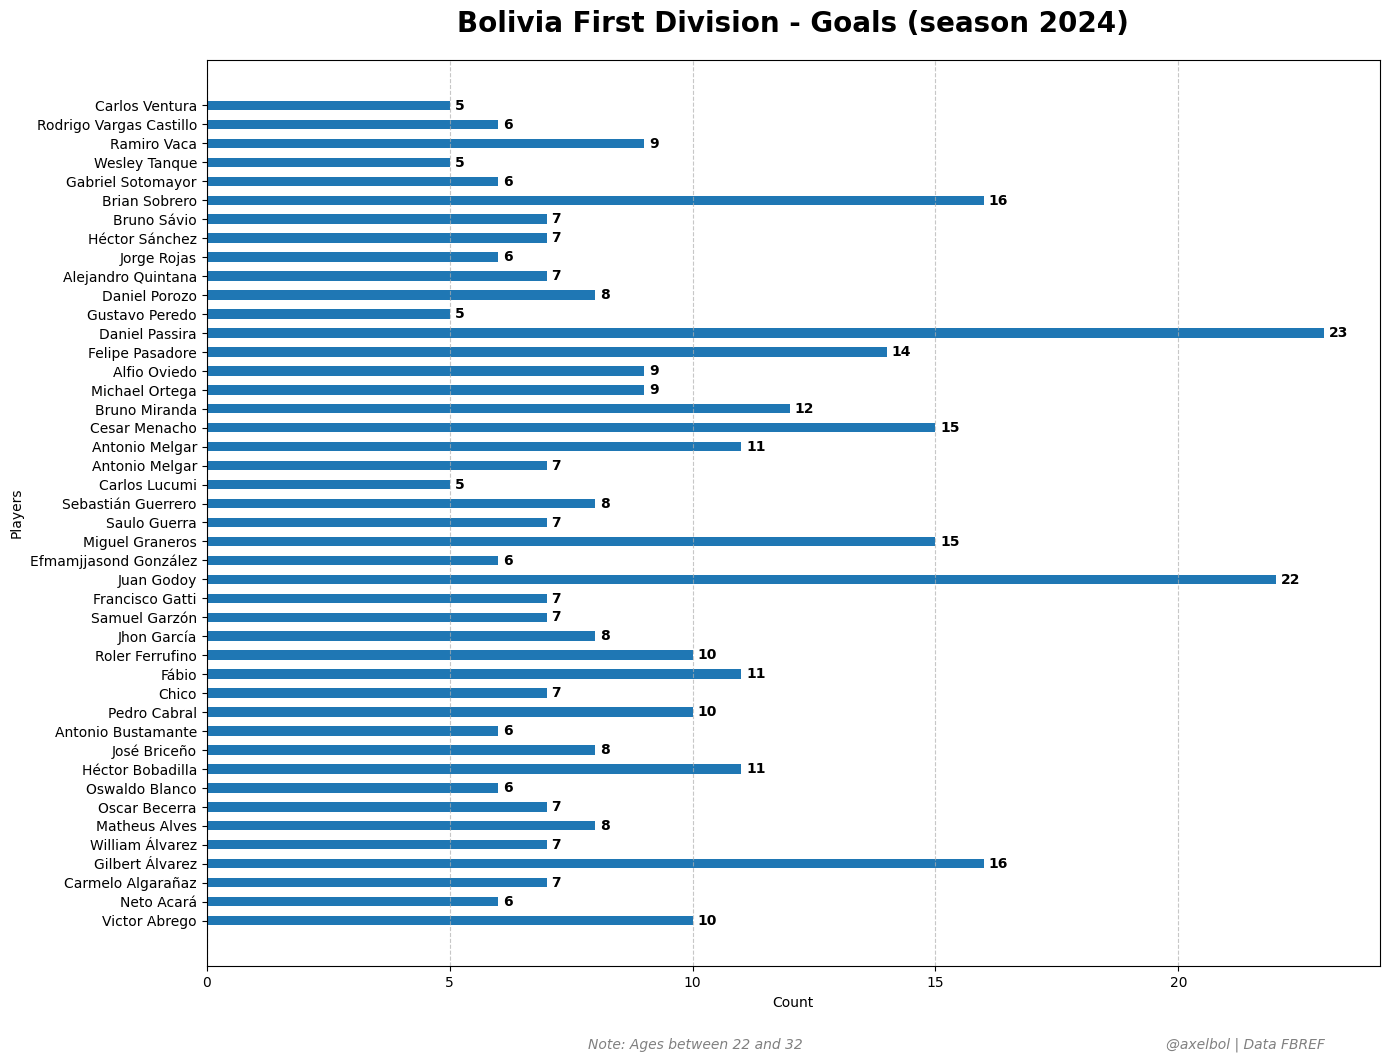

In [50]:
# Convert columns to numeric type explicitly
df_filter_goals['goals'] = pd.to_numeric(df_filter_goals['goals'], errors='coerce')

# Bar chart parameters
y = np.arange(len(df_filter_goals['player']))
width = 0.5

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Create total goals bars
bars = ax.barh(y, df_filter_goals['goals'].values, width, color='#1f77b4')

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title("Bolivia First Division - Goals (season 2024)", color='black', fontsize=20, pad=20, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(df_filter_goals['player'])

# Display values on the bars
for idx, goals in enumerate(df_filter_goals['goals']):
    if goals > 0:
        ax.text(goals + 0.1, idx, f'{int(goals)}', ha='left', va='center', color='black', fontweight='bold')

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add a footnote for PK reference
fig.text(0.5, -0.05, "Note: Ages between 22 and 32", ha='center', va='center', fontsize=10, color='gray', style='italic')

# Add Twitter handle
fig.text(0.95, -0.05, "@axelbol | Data FBREF", ha='right', va='center', fontsize=10, color='gray', style='italic')

# Adjust layout
plt.tight_layout(rect=[0, -0.03, 1, 1])

plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)
plt.show()

Top 10 with most goals in red

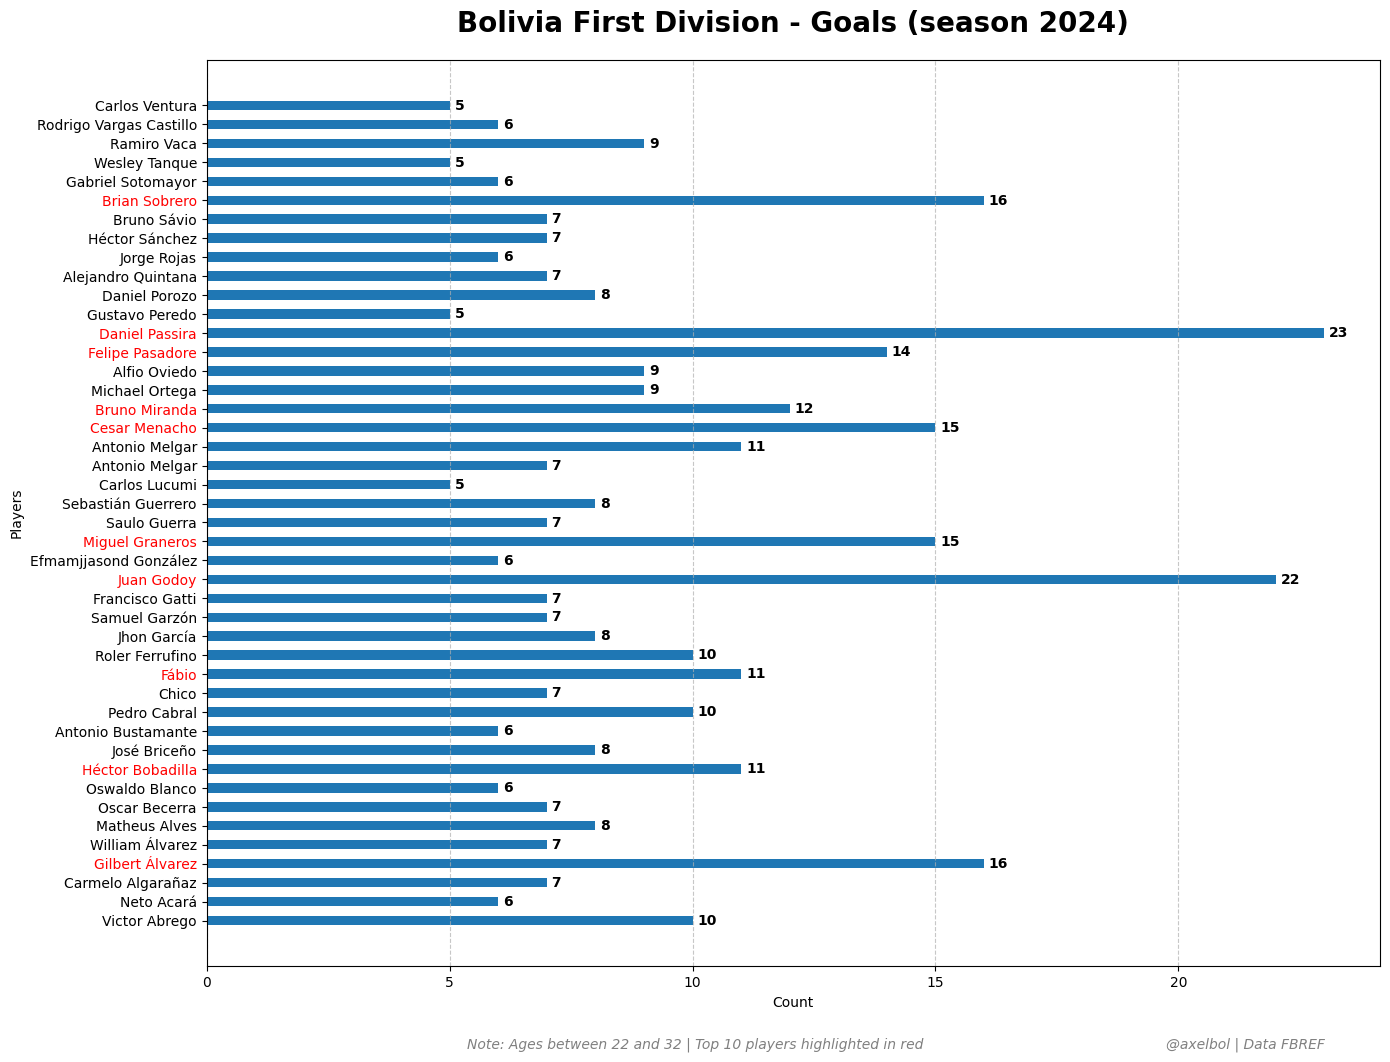

In [51]:
# Convert columns to numeric type explicitly
df_filter_goals['goals'] = pd.to_numeric(df_filter_goals['goals'], errors='coerce')

# Identify the top 10 players by goals
top_10_players = df_filter_goals.nlargest(10, 'goals')['player']

# Bar chart parameters
y = np.arange(len(df_filter_goals['player']))
width = 0.5

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Create total goals bars
bars = ax.barh(y, df_filter_goals['goals'].values, width, color='#1f77b4')

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title("Bolivia First Division - Goals (season 2024)", color='black', fontsize=20, pad=20, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(df_filter_goals['player'])

# Highlight the names of the top 10 players in red
for idx, (player, goals) in enumerate(zip(df_filter_goals['player'], df_filter_goals['goals'])):
    label_color = 'red' if player in top_10_players.values else 'black'  # Top 10 players in red
    ax.text(goals + 0.1, idx, f'{int(goals)}', ha='left', va='center', color='black', fontweight='bold')
    ax.get_yticklabels()[idx].set_color(label_color)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add a footnote for PK reference
fig.text(0.5, -0.05, "Note: Ages between 22 and 32 | Top 10 players highlighted in red", ha='center', va='center', fontsize=10, color='gray', style='italic')

# Add Twitter handle
fig.text(0.95, -0.05, "@axelbol | Data FBREF", ha='right', va='center', fontsize=10, color='gray', style='italic')

# Adjust layout
plt.tight_layout(rect=[0, -0.03, 1, 1])

plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)

plt.show()

Top10 BO players name in green

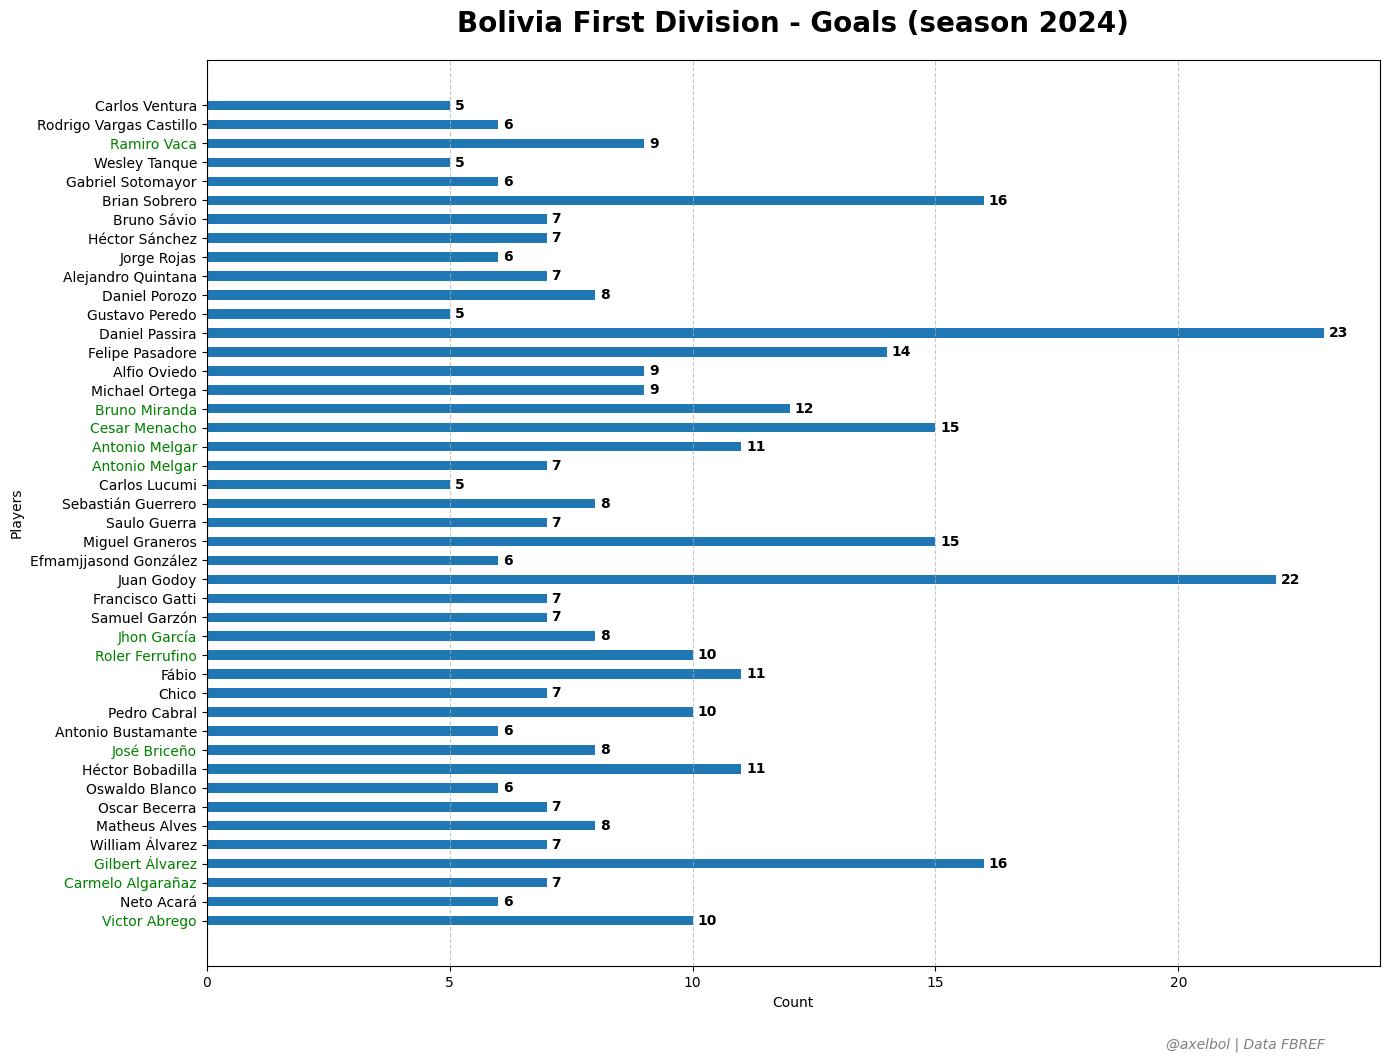

In [34]:
# Convert columns to numeric type explicitly
df_filter_goals['goals'] = pd.to_numeric(df_filter_goals['goals'], errors='coerce')

# Identify the top 5 players with most goals whose nation is 'bo BOL'
top_5_bo_bol_players = (
    df_filter_goals[df_filter_goals['nation'] == 'bo BOL']
    .nlargest(10, 'goals')['player']
)

# Bar chart parameters
y = np.arange(len(df_filter_goals['player']))
width = 0.5

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Create total goals bars
bars = ax.barh(y, df_filter_goals['goals'].values, width, color='#1f77b4')

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title("Bolivia First Division - Goals (season 2024)", color='black', fontsize=20, pad=20, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(df_filter_goals['player'])

# Display values on the bars
for idx, (player, goals) in enumerate(zip(df_filter_goals['player'], df_filter_goals['goals'])):
    label_color = 'green' if player in top_5_bo_bol_players.values else 'black'  # Highlight top 5 'bo BOL' players
    ax.text(goals + 0.1, idx, f'{int(goals)}', ha='left', va='center', color='black', fontweight='bold')
    ax.get_yticklabels()[idx].set_color(label_color)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add Twitter handle
fig.text(0.95, -0.05, "@axelbol | Data FBREF", ha='right', va='center', fontsize=10, color='gray', style='italic')

# Adjust layout
plt.tight_layout(rect=[0, -0.03, 1, 1])

plt.show()

Top 10 BO players bar in green

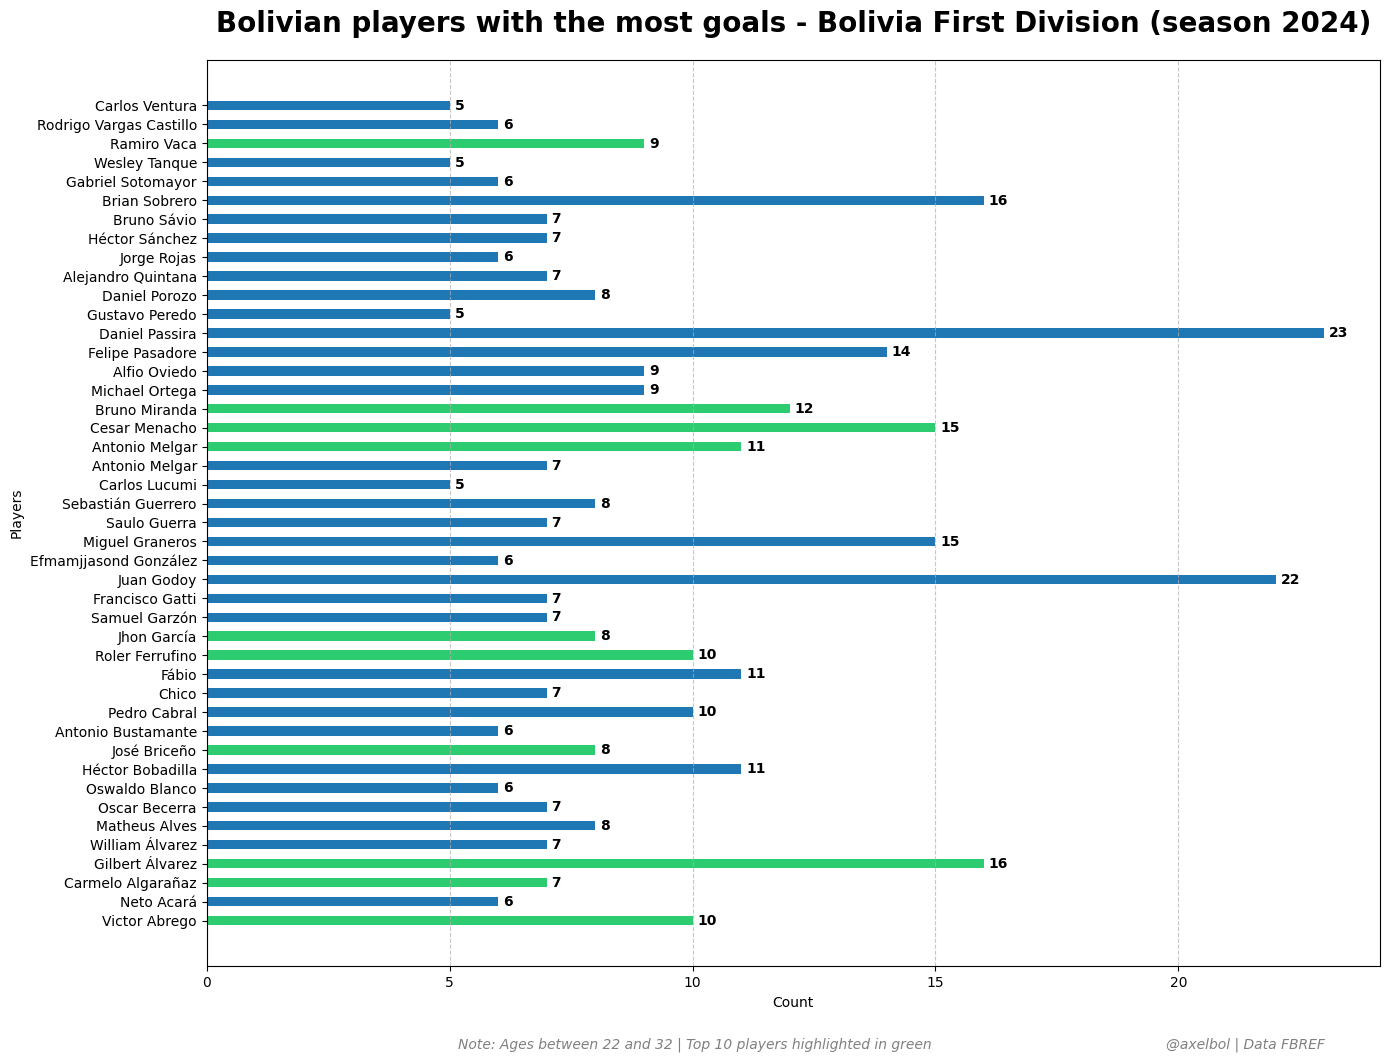

In [53]:
# Convert columns to numeric type explicitly
df_filter_goals['goals'] = pd.to_numeric(df_filter_goals['goals'], errors='coerce')

# Get indices of top 5 Bolivian players
bolivian_indices = df_filter_goals[df_filter_goals['nation'] == 'bo BOL'].nlargest(10, 'goals').index
colors = ['#2ecc71' if i in bolivian_indices else '#1f77b4' for i in df_filter_goals.index]

# Bar chart parameters
y = np.arange(len(df_filter_goals['player']))
width = 0.5

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Create total goals bars with conditional colors
bars = ax.barh(y, df_filter_goals['goals'].values, width, color=colors)

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title("Bolivian players with the most goals - Bolivia First Division (season 2024)", color='black', fontsize=20, pad=20, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(df_filter_goals['player'])

# Display values on the bars
for idx, goals in enumerate(df_filter_goals['goals']):
    if goals > 0:
        ax.text(goals + 0.1, idx, f'{int(goals)}', ha='left', va='center', color='black', fontweight='bold')

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add a footnote for PK reference
fig.text(0.5, -0.05, "Note: Ages between 22 and 32 | Top 10 players highlighted in green", ha='center', va='center', fontsize=10, color='gray', style='italic')

# Add Twitter handle
fig.text(0.95, -0.05, "@axelbol | Data FBREF", ha='right', va='center', fontsize=10, color='gray', style='italic')

# Adjust layout
plt.tight_layout(rect=[0, -0.03, 1, 1])

plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)
plt.show()

GK | General

In [41]:
df_gk = df_copy_bol[(df_copy_bol['pos'] == 'GK')].reset_index(drop=True)

In [44]:
df_gk.sort_values(by='mp', ascending=False)

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
41,Guillermo Vizcarra,bo BOL,GK,The Strongest,30.0,1993.0,38,38,3413,37.9,...,0,0,0,6,0,0.00,0.00,0.00,0.00,0.00
7,Alain Baroja,ve VEN,GK,Always Ready,34.0,1989.0,35,35,3063,34.0,...,0,0,0,4,1,0.00,0.00,0.00,0.00,0.00
15,Pedro Galindo,bo BOL,GK,Real Tomayapo,29.0,1994.0,35,35,3149,35.0,...,0,0,0,3,1,0.00,0.00,0.00,0.00,0.00
38,Braulio Uraezaña,bo BOL,GK,Blooming,28.0,1995.0,35,35,3134,34.8,...,0,0,0,5,0,0.00,0.00,0.00,0.00,0.00
24,Diego Méndez,bo BOL,GK,Royal Parí,33.0,1990.0,35,35,3150,35.0,...,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00
6,Luis Banegas,bo BOL,GK,GV San José,38.0,1985.0,34,34,3038,33.8,...,0,0,0,6,0,0.00,0.00,0.00,0.00,0.00
25,Saidt Mustafá,bo BOL,GK,Nacional Potosí,34.0,1989.0,33,33,2970,33.0,...,0,0,0,9,0,0.00,0.00,0.00,0.00,0.00
2,Gustavo Almada,bo BOL,GK,FC Universitario,29.0,1994.0,32,31,2865,31.8,...,0,0,0,4,0,0.00,0.00,0.00,0.00,0.00
1,David Akologo,bo BOL,GK,Aurora,26.0,1997.0,31,31,2801,31.1,...,0,0,0,4,0,0.00,0.00,0.00,0.00,0.00
13,Manuel Ferrel,bo BOL,GK,Guabirá,22.0,2001.0,30,30,2674,29.7,...,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00


Group By Team

In [54]:
df_copy_bol['squad'].value_counts()

squad
Real Santa Cruz          48
GV San José              43
Oriente Petrolero        42
Always Ready             41
FC Universitario         41
San Antonio Bulo Bulo    41
Indep Petrolero          40
Wilstermann              38
Royal Parí               37
The Strongest            37
Real Tomayapo            36
Bolívar                  36
Guabirá                  36
Aurora                   34
Nacional Potosí          33
Blooming                 30
Name: count, dtype: int64

In [57]:
df_inde = df_copy_bol[(df_copy_bol['squad'] == 'Indep Petrolero')].reset_index(drop=True)
df_inde.shape

(40, 23)

In [62]:
df_inde.sort_values(by='mp', ascending=False)

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
15,Juan Godoy,py PAR,MF,Indep Petrolero,30.0,1993.0,40,40,3425,38.1,...,19,3,3,10,0,0.58,0.05,0.63,0.50,0.55
35,Thomaz,br BRA,MF,Indep Petrolero,37.0,1986.0,36,28,2523,28.0,...,4,1,2,12,2,0.18,0.39,0.57,0.14,0.54
33,Wilfredo Soleto,bo BOL,MF,Indep Petrolero,27.0,1996.0,36,34,2851,31.7,...,0,0,0,11,0,0.00,0.00,0.00,0.00,0.00
24,Diego Navarro,bo BOL,FW,Indep Petrolero,31.0,1992.0,35,22,2026,22.5,...,3,0,0,10,0,0.13,0.00,0.13,0.13,0.13
14,Francisco Gatti,ar ARG,MF,Indep Petrolero,29.0,1994.0,31,22,1773,19.7,...,5,2,3,10,0,0.36,0.10,0.46,0.25,0.36
38,Diego Vargas,NaN,DF,Indep Petrolero,NaN,NaN,30,27,2354,26.2,...,1,0,0,4,0,0.04,0.04,0.08,0.04,0.08
11,Enrique David Díaz,uy URU,DF,Indep Petrolero,41.0,1982.0,30,24,2076,23.1,...,1,0,0,5,1,0.04,0.00,0.04,0.04,0.04
1,Elder Arauz,bo BOL,GK,Indep Petrolero,33.0,1990.0,28,28,2550,28.3,...,0,0,0,1,0,0.00,0.04,0.04,0.00,0.04
37,Denilson Valda,bo BOL,DF,Indep Petrolero,26.0,1997.0,28,14,1473,16.4,...,0,0,0,8,2,0.00,0.00,0.00,0.00,0.00
20,Alejandro Medina,bo BOL,FW,Indep Petrolero,27.0,1996.0,27,1,481,5.3,...,2,0,0,1,0,0.37,0.00,0.37,0.37,0.37
